# Project : Anticipate the Electricity Consumption Needs of Buildings

## 1. Business Understanding

### 1.1 Project description

The City of Seattle has committed to becoming carbon neutral by 2050, a critical step in mitigating climate change and reducing

carbon emissions. To achieve this goal, the City has embarked on a comprehensive project to assess and forecast the carbon 

emissions and energy consumption of its buildings. This project aims to provide a data-driven solution that will enable the 

city to make informed decisions regarding energy efficiency and carbon reduction. The project is divided into several key 

phases, beginning with data pre-processing and ending with an evaluation of the impact of the ENERGY STAR rating.

### 1.2 Project objectives

1. Data Preprocessing:

Objective: To prepare and clean the building energy benchmarking data for analysis.

Concatenation of Data: Combine building energy benchmarking data from 2015 and 2016 to create a comprehensive dataset.
Data Cleaning: Identify and handle missing values, outliers, and inconsistencies in the data.
Selection of Important Variables: Choose relevant features that are expected to influence energy consumption and CO2 emissions.
Data Analysis: Perform exploratory data analysis to gain insights into the dataset, such as trends, distributions, and correlations.
Data Preparation: Preprocess the data for modeling, which includes feature engineering, encoding categorical variables, and splitting the data into training and testing sets.

2. Predict Total Energy Consumption:

Objective: Develop a predictive model for total energy consumption based on building characteristics.

Select an appropriate regression model for predicting total energy consumption.
Train the model using the prepared dataset and evaluate its performance using appropriate metrics (e.g., Mean Absolute Error, Root Mean Square Error).
Fine-tune the model for better accuracy.

3. Predict Energy Source Proportions:

Objective: Predict the proportion of each energy source (e.g., electricity, gas) used by buildings.

Use the same variables as in the total energy consumption prediction to estimate the proportion of energy sources.
Develop a model for each energy source, considering their individual characteristics.
Evaluate the models and make necessary improvements.

4. Predict CO2 Emissions:

Objective: Create a model to predict CO2 emissions based on building characteristics and predictions of total energy consumption and energy source proportions.

Combine the predictions from the previous steps to estimate CO2 emissions.
Develop a regression model for CO2 emissions and evaluate its performance.
Refine the model as needed to achieve accurate predictions.

5. Evaluate the Impact of the ENERGY STAR Score:

Objective: Assess the value of the ENERGY STAR Score in predicting emissions and energy consumption.

Analyze the correlation between the ENERGY STAR Score and actual energy consumption and CO2 emissions.
Evaluate the effectiveness of the ENERGY STAR Score as a benchmark for energy efficiency.
Provide recommendations and insights based on the analysis.

#### Import Libraries

In [1]:
# Common ML Libraries
import pandas as pd  # Library for data manipulation
import numpy as np   # Library for numerical operations
import matplotlib.pyplot as plt  # Library for data visualization
import os  # Operating System specific functions
import seaborn as sns  # Statistical data visualization
import time  # Time-related functions
import pickle  # Serialization and deserialization of Python objects
from scipy.stats import uniform  # Probability distribution functions
from textwrap import wrap  # Text wrapping utility
import json  # JSON (JavaScript Object Notation) encoding and decoding

# Data Splitting
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.model_selection import KFold  # k-fold cross-validation

# Models
from sklearn.dummy import DummyRegressor  # Dummy Regressor for baseline predictions
from sklearn.linear_model import ElasticNet  # Elastic Net linear regression
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting Regressor
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor
from sklearn.ensemble import ExtraTreesRegressor  # Extra Trees Regressor
from sklearn.base import clone  # Create a clone of an estimator

# Metrics
from sklearn.metrics import mean_squared_error  # Mean Squared Error
from sklearn.metrics import mean_absolute_error  # Mean Absolute Error
from sklearn.utils import check_array  # Ensure input is an array

# Cross Validation
from sklearn.model_selection import cross_val_score  # Cross-validation score
from sklearn.model_selection import cross_validate  # Cross-validation with multiple scoring metrics
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV  # Randomized search for hyperparameter tuning

# Creating Pipelines
from sklearn.base import TransformerMixin  # Base class for transformers
from sklearn.base import BaseEstimator  # Base class for estimators
from sklearn.pipeline import Pipeline  # Pipeline for chaining multiple transformers and estimators
from sklearn.pipeline import FeatureUnion  # Concatenate results of multiple transformer objects
from sklearn.compose import ColumnTransformer  # Applies transformers to columns of an array

# Variable Transformers
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import LabelBinarizer  # Binarize labels (convert them to a binary matrix)
from sklearn.preprocessing import OneHotEncoder  # Encode categorical integer features as a one-hot numeric array
from sklearn.preprocessing import LabelEncoder  # Encode labels with a value between 0 and n_classes-1
from sklearn.impute import SimpleImputer  # Imputation transformer for completing missing values
from category_encoders.target_encoder import TargetEncoder  # Encode categorical features using the mean of the target variable
from sklearn.feature_extraction import FeatureHasher  # Feature hashing, a technique for vectorizing features

## 2. Data Understanding

### 2.1. Importing data

In [2]:
# Path to csv files

path = "C:\\Users\\Yassine\\dataanalytics"

# Read Data

data_2015 = pd.read_csv(os.path.join(path, "2015-building-energy-benchmarking.csv"), sep=",")
data_2016 = pd.read_csv(os.path.join(path, "2016-building-energy-benchmarking.csv"), sep=",")

### 2.2. Data exploration

There are two sets of consumption data available: one for the year 2015 and another for the year 2016. 

#### 2.2.1 Displaying the Data

In [3]:
print("There are {} different buildings for the 2015 readings".format(data_2015["OSEBuildingID"].nunique()))
# Display the first 3 rows of the 2015 data
data_2015.head(3)

There are 3340 different buildings for the 2015 readings


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN


In [4]:
print("There are {} different buildings for the 2016 readings".format(data_2016["OSEBuildingID"].nunique()))
# Display the first 3 rows of the 2016 data
data_2016.head(3)

There are 3376 different buildings for the 2016 readings


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


In [5]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OSEBuildingID                      3340 non-null   int64  
 1   DataYear                           3340 non-null   int64  
 2   BuildingType                       3340 non-null   object 
 3   PrimaryPropertyType                3340 non-null   object 
 4   PropertyName                       3340 non-null   object 
 5   TaxParcelIdentificationNumber      3338 non-null   object 
 6   Location                           3340 non-null   object 
 7   CouncilDistrictCode                3340 non-null   int64  
 8   Neighborhood                       3340 non-null   object 
 9   YearBuilt                          3340 non-null   int64  
 10  NumberofBuildings                  3340 non-null   int64  
 11  NumberofFloors                     3332 non-null   float

In [6]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

## 3. Data preparation and pre-processing

#####  Data Concatenation

There are 2 sets of data for the buildings under study (2015 and 2016). The task is to concatenate the data by detecting duplicates and ensuring column correspondence.

#### Displaying columns that are not common to both years

In [7]:
#Columns in 2015 data that are not in 2016 data
[col for col in data_2015 if col not in data_2016]

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment']

In [8]:
# Columns in 201 data that are not in 2015 data
[col for col in data_2016 if col not in data_2015]

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

#### Display columns common to both years

In [9]:
[col for col in data_2016 if col in data_2015]

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

#### We ensure the uniqueness of buildings in both surveys using the OSEBuildingID column.

In [10]:
# We retrieve the 2016 building data whose OSEBuildingID is not in the 2015 data
OSEBuildingID = [OSEBuildingID for OSEBuildingID in data_2015["OSEBuildingID"] if OSEBuildingID not in data_2016["OSEBuildingID"].values]
#data_2016 = data_2016[data_2016["OSEBuildingID"].isin(OSEBuildingID)]
print("For the 2015 survey, there are {} buildings that do not exist in the 2016 survey".format(len(OSEBuildingID)))

For the 2015 survey, there are 56 buildings that do not exist in the 2016 survey


It's the same city, so logically, both surveys contain a majority of common buildings.

### 3.1. Data cleaning

#### Renaming the columns ''GHGEmissions(MetricTonsCO2e)' and 'GHGEmissionsIntensity(kgCO2e/ft2)'

In [11]:
# Renaming columns in the 2015 dataset to have the same variable names as in 2016 (Energy and CO2)
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                          'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'},
                 inplace=True)

#### Renaming the 'Comment' column

In [12]:
data_2015.rename(columns={'Comment': 'Comments'},
                 inplace=True)

The columns 'GHGEmissions(MetricTonsCO2e)' and 'GHGEmissionsIntensity(kgCO2e/ft2)' in the 2015 dataset have been renamed to match the column names in the 2016 dataset.

#### Location Variable: Longitude and Latitude in the 2015 Data

In [13]:

import ast  # This library helps parse strings into dictionaries

# Assuming 'Location' column contains dictionary-like strings
data_2015['Location'] = data_2015['Location'].apply(lambda x: ast.literal_eval(x))

# Create new columns for latitude and longitude
data_2015['Latitude'] = data_2015['Location'].apply(lambda x: x['latitude'])
data_2015['Longitude'] = data_2015['Location'].apply(lambda x: x['longitude'])

# Drop the original 'Location' column if needed
data_2015.drop(columns=['Location'], inplace=True)

# Print the DataFrame to verify the changes
print(data_2015)

      OSEBuildingID  DataYear          BuildingType    PrimaryPropertyType  \
0                 1      2015        NonResidential                  Hotel   
1                 2      2015        NonResidential                  Hotel   
2                 3      2015        NonResidential                  Hotel   
3                 5      2015        NonResidential                  Hotel   
4                 8      2015        NonResidential                  Hotel   
...             ...       ...                   ...                    ...   
3335          50049      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3336          50055      2015  Multifamily MR (5-9)   Mid-Rise Multifamily   
3337          50057      2015  Multifamily HR (10+)  High-Rise Multifamily   
3338          50058      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3339          50059      2015  Multifamily LR (1-4)   Low-Rise Multifamily   

                    PropertyName TaxParcelIdentificationNumber 

#### Processing 'OtherFuelUse(kBtu)'

In [14]:
print(data_2016["SiteEnergyUse(kBtu)"].isnull().sum())
print(data_2016["SteamUse(kBtu)"].isnull().sum())
print(data_2016["Electricity(kBtu)"].isnull().sum())
print(data_2016["NaturalGas(kBtu)"].isnull().sum())

5
9
9
9


In [15]:
# Adding the "OtherFuelUse(kBtu)" column filled with 0.0
data_2016["OtherFuelUse(kBtu)"] = 0.0

# Selecting all buildings where the difference between total energy
# and energy from different sources is greater than 1000 (a value beyond which it's not likely due to measurement errors)
cond_to_fill = (data_2016["SiteEnergyUse(kBtu)"]
                - data_2016["SteamUse(kBtu)"]
                - data_2016["Electricity(kBtu)"]
                - data_2016["NaturalGas(kBtu)"]) > 1000

# Replacing the values for the buildings found earlier with the calculated difference
data_2016.loc[cond_to_fill, "OtherFuelUse(kBtu)"] = (data_2016["SiteEnergyUse(kBtu)"]
                                                    - data_2016["SteamUse(kBtu)"]
                                                    - data_2016["Electricity(kBtu)"]
                                                    - data_2016["NaturalGas(kBtu)"])

# For the year 2015, missing values in the "OtherFuelUse(kBtu)" column are replaced with 0
data_2015["OtherFuelUse(kBtu)"].fillna(0, inplace=True)

# Ensure that the "OtherFuelUse(kBtu)" column has the int64 data type
data_2016["OtherFuelUse(kBtu)"] = data_2016["OtherFuelUse(kBtu)"].astype('int64')
data_2015["OtherFuelUse(kBtu)"] = data_2015["OtherFuelUse(kBtu)"].astype('int64')

#### Deleting columns that are not common to both years

In [16]:
# # Deleting the last columns from 2016
data_2016.drop(columns=[col for col in data_2016 if col not in data_2015],
               inplace=True)

#### Convert numeric variables that are categorical variables.

In [17]:
#  Convert the 'CouncilDistrictCode' column in both the 2015 and 2016 datasets into a string data type
data_2015["CouncilDistrictCode"] = data_2015["CouncilDistrictCode"].apply(str)
data_2016["CouncilDistrictCode"] = data_2016["CouncilDistrictCode"].apply(str)

The variable 'CouncilDistrictCode' is of type "int," but it is more suitable to treat it as a categorical variable. Therefore, it is converted into a "string" data type to reflect its categorical nature.

#### Concatenation of 2015 and 2016 data

In [18]:
# Combining the 2015 and 2016 data
data = pd.concat([data_2015, data_2016], sort=False)

In [19]:
# Exclude non-numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Group by 'OSEBuildingID
data = numeric_columns.groupby(["OSEBuildingID"]).mean()

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3432 entries, 1 to 50226
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3432 non-null   float64
 1   YearBuilt                        3432 non-null   float64
 2   NumberofBuildings                3431 non-null   float64
 3   NumberofFloors                   3432 non-null   float64
 4   PropertyGFATotal                 3432 non-null   float64
 5   PropertyGFAParking               3432 non-null   float64
 6   PropertyGFABuilding(s)           3432 non-null   float64
 7   LargestPropertyUseTypeGFA        3402 non-null   float64
 8   SecondLargestPropertyUseTypeGFA  1704 non-null   float64
 9   ThirdLargestPropertyUseTypeGFA   607 non-null    float64
 10  ENERGYSTARScore                  2656 non-null   float64
 11  SiteEUI(kBtu/sf)                 3429 non-null   float64
 12  SiteEUIWN(kBtu/sf)      

In [21]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3340 non-null   int64  
 1   DataYear                         3340 non-null   int64  
 2   BuildingType                     3340 non-null   object 
 3   PrimaryPropertyType              3340 non-null   object 
 4   PropertyName                     3340 non-null   object 
 5   TaxParcelIdentificationNumber    3338 non-null   object 
 6   CouncilDistrictCode              3340 non-null   object 
 7   Neighborhood                     3340 non-null   object 
 8   YearBuilt                        3340 non-null   int64  
 9   NumberofBuildings                3340 non-null   int64  
 10  NumberofFloors                   3332 non-null   float64
 11  PropertyGFATotal                 3340 non-null   int64  
 12  PropertyGFAParking  

In [22]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   TaxParcelIdentificationNumber    3376 non-null   object 
 6   CouncilDistrictCode              3376 non-null   object 
 7   Neighborhood                     3376 non-null   object 
 8   Latitude                         3376 non-null   float64
 9   Longitude                        3376 non-null   float64
 10  YearBuilt                        3376 non-null   int64  
 11  NumberofBuildings                3368 non-null   float64
 12  NumberofFloors      

### 3.2. Data visualization & reduction

In [23]:
# List of categorical variables
cat_attribs = list(data_2015.drop(columns=list(data.columns) + ["OSEBuildingID"]).columns)

# Add the values of categorical variables for the 2016 buildings
data[cat_attribs] = data_2016.set_index("OSEBuildingID")[cat_attribs]

# Find the building IDs that are in 2015 but not in 2016
missing_building_ids = [ID for ID in data_2015["OSEBuildingID"] if ID not in data_2016["OSEBuildingID"].values]

# Add the missing building IDs and their corresponding data to the DataFrame
missing_data_2015 = data_2015.set_index("OSEBuildingID").loc[missing_building_ids, cat_attribs]
data = pd.concat([data, missing_data_2015])

In [24]:
print("The number of unique buildings is: {}".format(len(data)))

The number of unique buildings is: 3488


##### Categorical and Numeric Variables

####  Categorical Variables 

In [25]:
# Selecting columns with 'object' data types
obj_columns = list(data.select_dtypes(include=['object', 'bool']).columns)

In [26]:
print("The categorical variables are as follows. : \n")
for categ in obj_columns :
    print(categ, ":", data[categ].nunique())

The categorical variables are as follows. : 

BuildingType : 8
PrimaryPropertyType : 26
PropertyName : 3418
TaxParcelIdentificationNumber : 3321
CouncilDistrictCode : 7
Neighborhood : 19
ListOfAllPropertyUseTypes : 472
LargestPropertyUseType : 57
SecondLargestPropertyUseType : 50
ThirdLargestPropertyUseType : 44
YearsENERGYSTARCertified : 65
DefaultData : 4
Comments : 1
ComplianceStatus : 4
Outlier : 3
Latitude : 2932
Longitude : 2712


####  Numerical Variables 

In [27]:
# float64 columns are selected 
num_columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
print("The numerical variables are as follows : \n")
for num in num_columns :
    print(num)

The numerical variables are as follows : 

DataYear
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
LargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
OtherFuelUse(kBtu)
TotalGHGEmissions
GHGEmissionsIntensity


#####  Display missing data

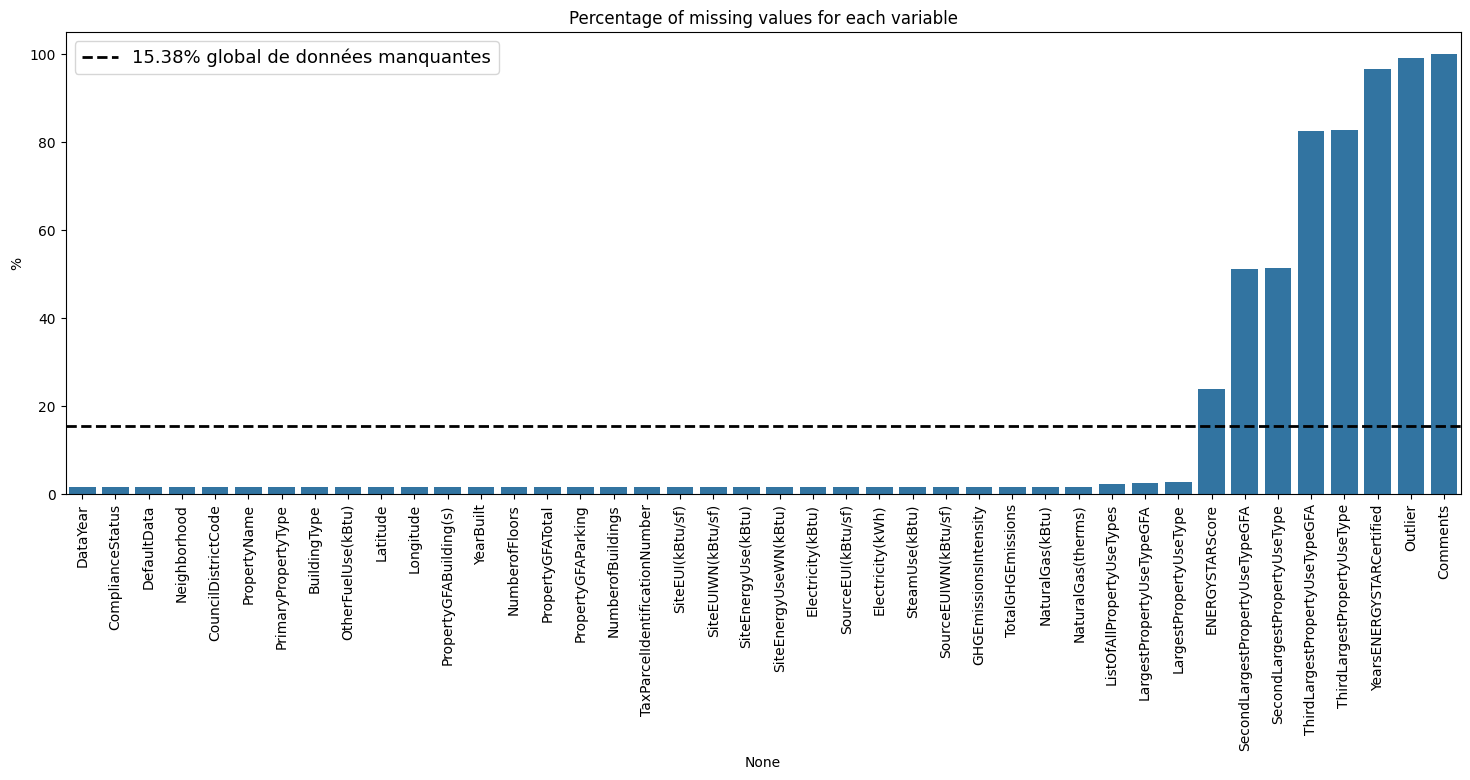

In [28]:
#We calculate the proportion of missing data for each column and plot it!
fig = plt.figure(figsize=(18, 6))

null_prop = data.isnull().sum(axis=0).sum()/len(data)/len(data.columns)*100
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)

null = data.isnull().sum(axis=0).sort_values()/len(data)*100
sns.barplot(x=null.index, y=null.values)
plt.ylabel("%")
plt.title("Percentage of missing values for each variable")
plt.xticks(rotation=90)
plt.show()

####  Handling Columns with High Missing Values

#### Imputation of Some Missing Values

The columns 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', and 'ThirdLargestPropertyUseTypeGFA' contain a significant number of missing values. It is considered that buildings with missing values for these variables do not have a second and third use type. Therefore, a new category is added to the use types, and the surface values are replaced with 0.

In [29]:
# Missing values are replaced with an additional category
data["SecondLargestPropertyUseType"].fillna("Nothing", inplace=True)

# Missing values are replaced with 0
data["SecondLargestPropertyUseTypeGFA"].fillna(0, inplace=True)

In [30]:
# Missing values are replaced with an additional category
data["ThirdLargestPropertyUseType"].fillna("Nothing", inplace=True)

#Missing values are replaced with 0
data["ThirdLargestPropertyUseTypeGFA"].fillna(0, inplace=True)

#### Removal of Uninformed Variables

The columns with missing data exceeding 25% are deleted.

In [31]:
#Columns with missing data exceeding 25% are deleted
null = data.isnull().sum(axis=0).sort_values()/len(data)*100
cond = null < 25
cond = cond[cond == True]
data = data.loc[:, cond.index]

#### Removing Irrelevant Columns

In [32]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3488 entries, 1 to 49859
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ThirdLargestPropertyUseType      3488 non-null   object 
 1   SecondLargestPropertyUseType     3488 non-null   object 
 2   SecondLargestPropertyUseTypeGFA  3488 non-null   float64
 3   ThirdLargestPropertyUseTypeGFA   3488 non-null   float64
 4   DataYear                         3432 non-null   float64
 5   ComplianceStatus                 3432 non-null   object 
 6   DefaultData                      3432 non-null   object 
 7   Neighborhood                     3432 non-null   object 
 8   CouncilDistrictCode              3432 non-null   object 
 9   PropertyName                     3432 non-null   object 
 10  PrimaryPropertyType              3432 non-null   object 
 11  BuildingType                     3432 non-null   object 
 12  OtherFuelUse(kBtu)      

In [33]:
# List of columns that seem irrelevant for prediction
col_to_del = ["GHGEmissionsIntensity", 
              "NaturalGas(therms)", 
              "DataYear", 
              'TaxParcelIdentificationNumber', 
              'PropertyName']
# Removing irrelevant columns
data.drop(columns=col_to_del, inplace=True)

# New list of numerical columns
num_columns = list(data.select_dtypes(include='float64').columns)


#### Treatment of outliers and extreme values

#####  Outliers and Missing Targets.

Buildings with missing or negative target values are removed

In [34]:
for label in ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'] :
    print("The number of buildings where {} is missing is : {}".format(label, data[label].isna().sum()))
    print("The number of buildings where {} is <=0 is : {}".format(label, sum(data[label]<0.0)))
    data = data[data[label]>=0.0] # Deletion of buildings with negative or zero value

The number of buildings where TotalGHGEmissions is missing is : 60
The number of buildings where TotalGHGEmissions is <=0 is : 0
The number of buildings where SiteEnergyUse(kBtu) is missing is : 0
The number of buildings where SiteEnergyUse(kBtu) is <=0 is : 0


Replacement of negative values for area and buildings with NaN

In [35]:
for label in ["PropertyGFAParking", "PropertyGFABuilding(s)"] :
    print("The number of buildings where {} is <0 is : {}".format(label, sum(data[label]<0.0)))
    values_to_nan = data.loc[data[label]<0, label].unique()
    data[label].replace(values_to_nan, np.nan, inplace=True)


The number of buildings where PropertyGFAParking is <0 is : 2
The number of buildings where PropertyGFABuilding(s) is <0 is : 1


We ensure that the consumption of each energy source is equal to the total consumption (with a margin of 1%)

In [36]:
list_energy = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', "OtherFuelUse(kBtu)"]
data["diff_energy"] = abs((data[list_energy].sum(axis=1) - data["SiteEnergyUse(kBtu)"]))/(data["SiteEnergyUse(kBtu)"]+0.0001)
print("The number of buildings where the consumption of each energy source is not equal to the total consumption is : {}" \
      .format(sum(data["diff_energy"]>1e-4)))
data = data[data["diff_energy"]<1e-4]
data.drop(columns=["diff_energy"], inplace=True)

The number of buildings where the consumption of each energy source is not equal to the total consumption is : 22


####   Handling Outliers

It is interesting to observe the distributions of the target variables to identify if there are outliers in buildings, i.e., either very high or very low values

#### Energy and CO2 Variables Without Transformation

C:\Users\Yassine\AppData\Local\Temp\ipykernel_22728\640819513.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[label], bins=int(1 + np.log2(len(data))), ax=axes[i, 0])
C:\Users\Yassine\AppData\Local\Temp\ipykernel_22728\640819513.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[l

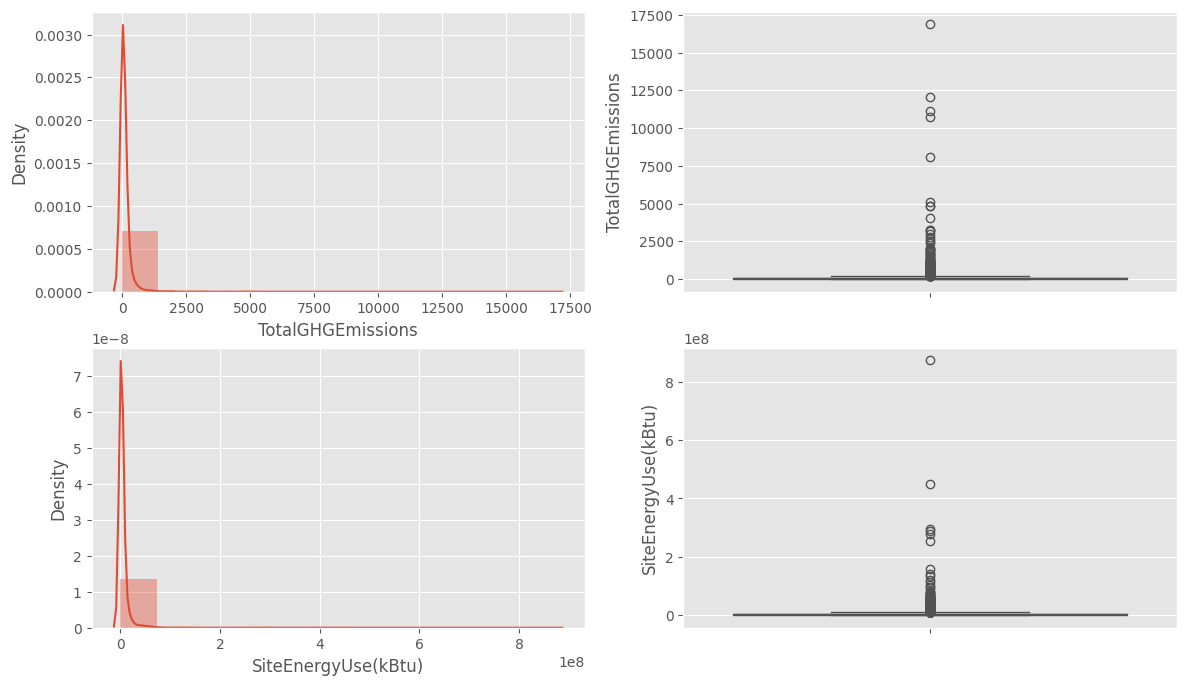

In [37]:
plt.style.use('ggplot')

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for i, label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]):
    sns.distplot(data[label], bins=int(1 + np.log2(len(data))), ax=axes[i, 0])
    sns.boxplot(data[label], orient="v", ax=axes[i, 1])

plt.show()

Buildings with high energy consumption and high CO2 emissions, in a significant number, make the distribution asymmetrical
(high-emission buildings is likely causing the data distribution to be skewed towards higher values, creating an asymmetrical shape in the histogram)

#### Energy and CO2 Variables with Logarithmic Transformation

C:\Users\Yassine\AppData\Local\Temp\ipykernel_22728\1839272846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(data))))
C:\Users\Yassine\AppData\Local\Temp\ipykernel_22728\1839272846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

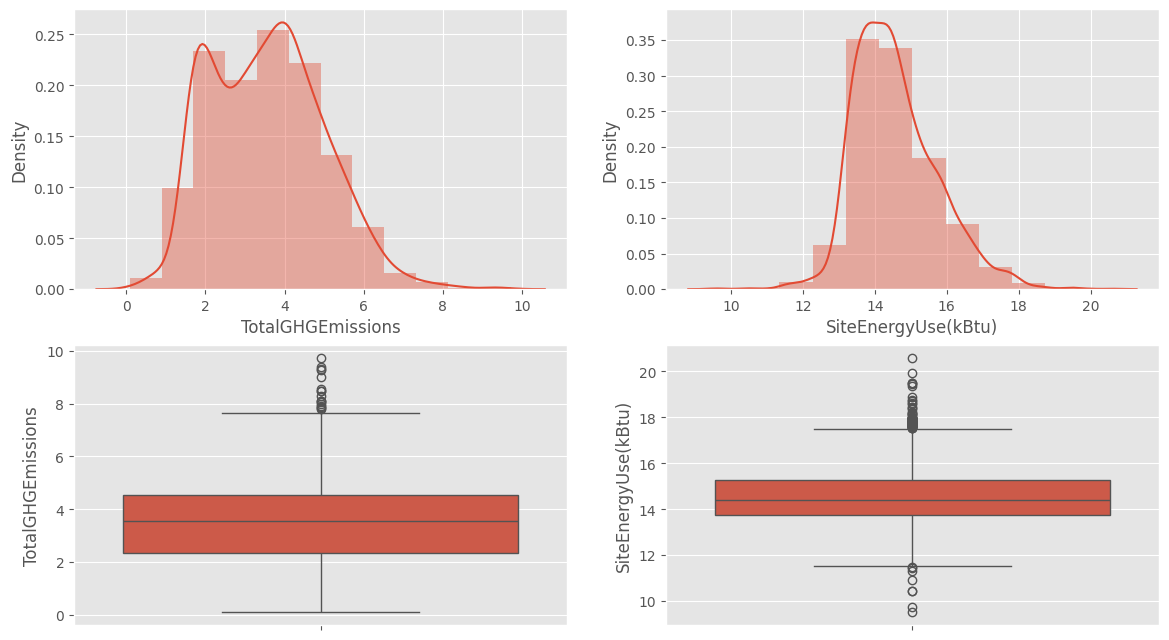

In [38]:
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(data))))
    plt.subplot(2,2,i+3)
    sns.boxplot(data[label].apply(lambda x : np.log(1 + x)), orient="v")
plt.show()

Now, our target variables have 'normal' distributions, so the Tukey method can be applied to remove outliers.
It  is a common technique for identifying and removing outliers in a dataset. 
(The general steps for applying the Tukey method to remove outliers are as follows:

Calculate the first quartile (Q1) and third quartile (Q3) of the data.
Calculate the interquartile range (IQR), which is the difference between Q3 and Q1.
Define a lower threshold (Q1 - k * IQR) and an upper threshold (Q3 + k * IQR), where 'k' is a constant typically set to 1.5 or 3, depending on the level of outlier sensitivity desired.
Identify values in the data that fall below the lower threshold or above the upper threshold as outliers.
Remove or mark these outliers for further analysis.)

Calculation of IQR (Interquartile Range) for total energy

In [39]:
Q1 = round(np.percentile(data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x)), 25))
Q3 = round(np.percentile(data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x)), 75))

born_sup_energy = Q3 + 1.5*(Q3-Q1)
born_inf_energy = Q1 - 1.5*(Q3-Q1)

Calculation of IQR (Interquartile Range) for CO2 emissions

In [40]:
Q1 = round(np.percentile(data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x)), 25))
Q3 = round(np.percentile(data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x)), 75))

born_sup_co2 = Q3 + 1.5*(Q3-Q1) 
born_inf_co2 = Q1 - 1.5*(Q3-Q1)

Removal of outliers in total energy and CO2 emissions

In [41]:
data = data[(data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x))<born_sup_energy) & (data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x))>born_inf_energy)]
data = data[(data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x))<born_sup_co2) & (data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x))>born_inf_co2)]

In [42]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3137 entries, 1 to 50226
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ThirdLargestPropertyUseType      3137 non-null   object 
 1   SecondLargestPropertyUseType     3137 non-null   object 
 2   SecondLargestPropertyUseTypeGFA  3137 non-null   float64
 3   ThirdLargestPropertyUseTypeGFA   3137 non-null   float64
 4   ComplianceStatus                 3090 non-null   object 
 5   DefaultData                      3090 non-null   object 
 6   Neighborhood                     3090 non-null   object 
 7   CouncilDistrictCode              3090 non-null   object 
 8   PrimaryPropertyType              3090 non-null   object 
 9   BuildingType                     3090 non-null   object 
 10  OtherFuelUse(kBtu)               3137 non-null   float64
 11  Latitude                         3090 non-null   object 
 12  Longitude               

C:\Users\Yassine\AppData\Local\Temp\ipykernel_22728\1839272846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(data))))
C:\Users\Yassine\AppData\Local\Temp\ipykernel_22728\1839272846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

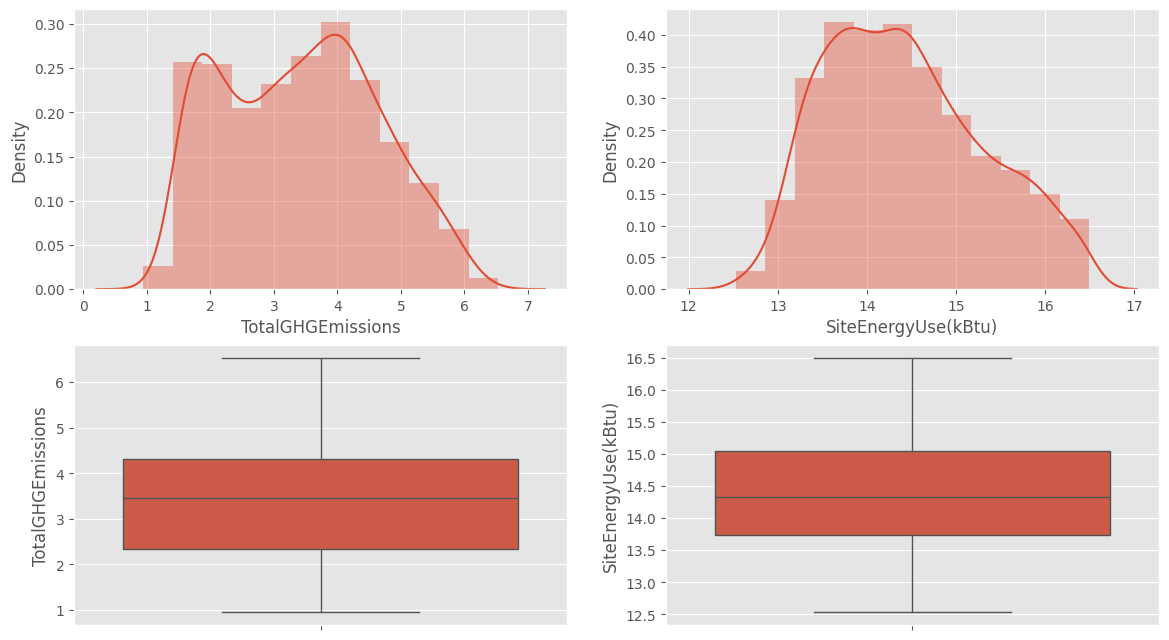

In [43]:
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(data))))
    plt.subplot(2,2,i+3)
    sns.boxplot(data[label].apply(lambda x : np.log(1 + x)), orient="v")
plt.show()

In [44]:
print("The number of the remaining buildings is : {}".format(len(data)))

The number of the remaining buildings is : 3137


#### Energy Variables

In [45]:
# We retrieve the total energy and CO2 emissions
TotalEnergyUse = data["SiteEnergyUse(kBtu)"]
TotalCO2 = data["TotalGHGEmissions"]

# We calculate the proportions of each energy source
data["Electricity"] = data["Electricity(kBtu)"]/data["SiteEnergyUse(kBtu)"]
data["NaturalGas"] = data["NaturalGas(kBtu)"]/data["SiteEnergyUse(kBtu)"]
data["SteamUse"] = data["SteamUse(kBtu)"]/data["SiteEnergyUse(kBtu)"]
data["OtherFuelUse"] = data["OtherFuelUse(kBtu)"]/data["SiteEnergyUse(kBtu)"]

In [46]:
# We remove columns containing energy quantities (kBtu and kWh) and CO2 emissions
col_to_del = []
for col in data :
    if ('kBtu' in col) or  ('kWh' in col) or ('CO2' in col) :
        col_to_del.append(col)
        
data.drop(columns=col_to_del, inplace=True)

# We retrieve total energy and CO2 emissions
data["SiteEnergyUse(kBtu)"] = TotalEnergyUse
data["TotalGHGEmissions"] = TotalCO2

In [47]:
print("The number of the remaining buildings is : {}".format(len(data)))

The number of the remaining buildings is : 3137


In [48]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3137 entries, 1 to 50226
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ThirdLargestPropertyUseType      3137 non-null   object 
 1   SecondLargestPropertyUseType     3137 non-null   object 
 2   SecondLargestPropertyUseTypeGFA  3137 non-null   float64
 3   ThirdLargestPropertyUseTypeGFA   3137 non-null   float64
 4   ComplianceStatus                 3090 non-null   object 
 5   DefaultData                      3090 non-null   object 
 6   Neighborhood                     3090 non-null   object 
 7   CouncilDistrictCode              3090 non-null   object 
 8   PrimaryPropertyType              3090 non-null   object 
 9   BuildingType                     3090 non-null   object 
 10  Latitude                         3090 non-null   object 
 11  Longitude                        3090 non-null   object 
 12  YearBuilt               

#### Correlation Between Variables

The correlation matrix helps determine if some information is not redundant

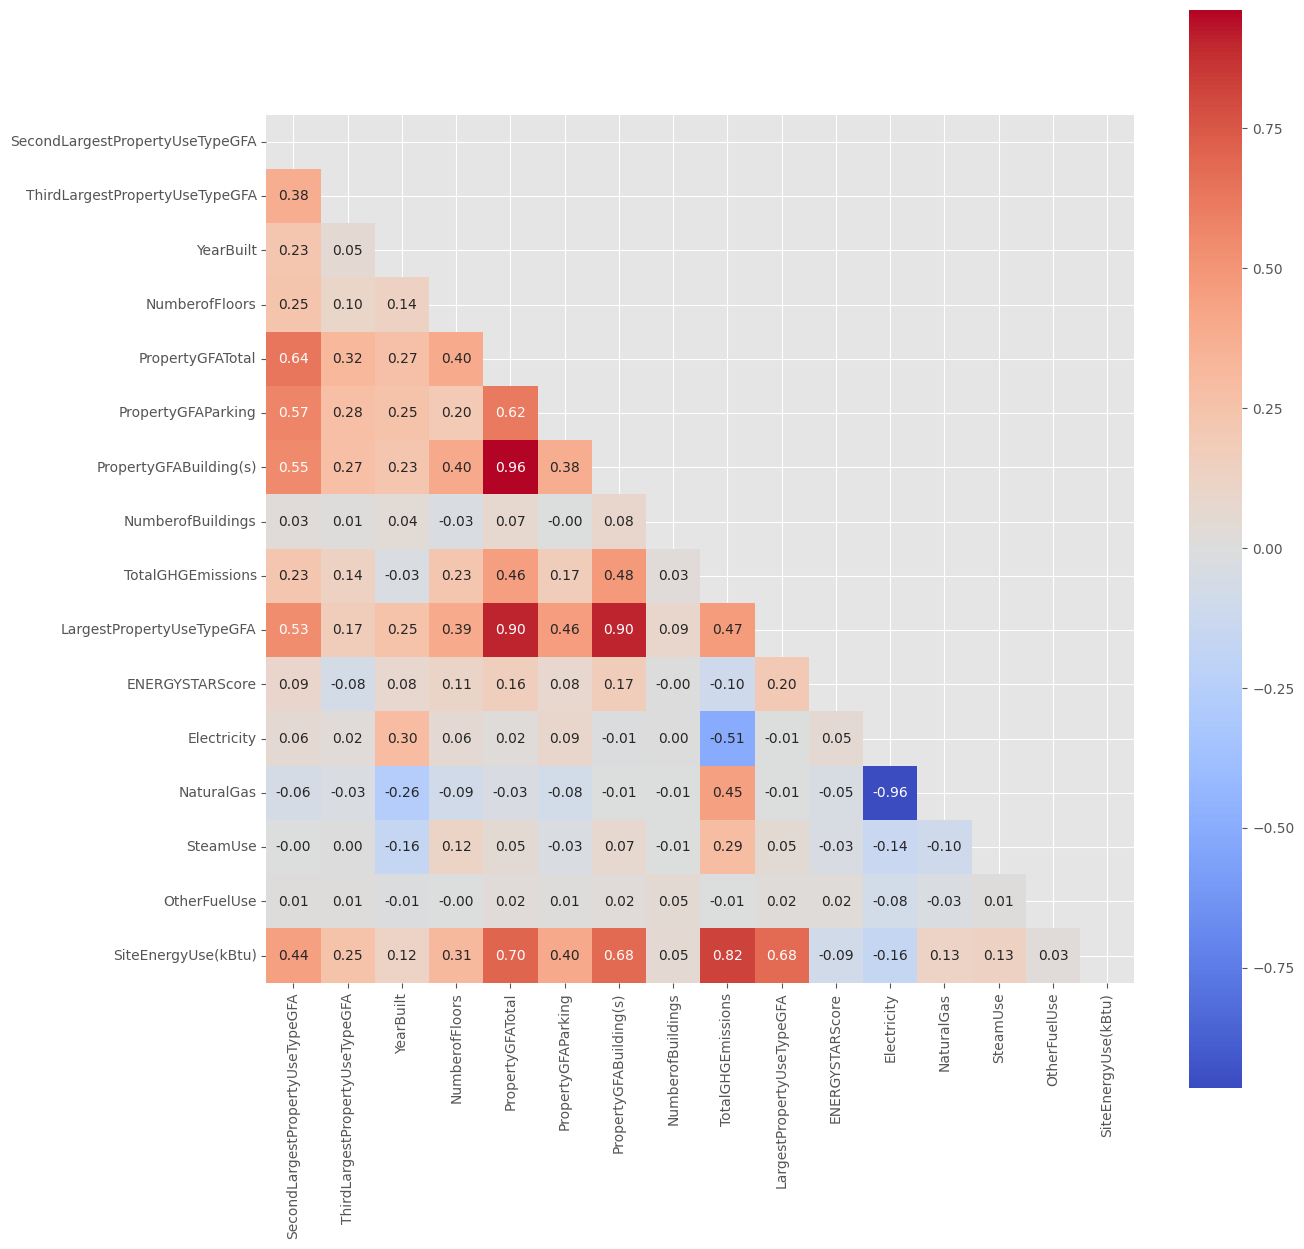

In [49]:
data = data.select_dtypes(include=[np.number])
# Handle missing values (replace with 0, but you can choose an appropriate strategy)
data.fillna(0, inplace=True)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 14))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, square=True)

# Show the plot
plt.show()

- Total energy consumption is strongly correlated with the building area.
- CO2 emissions are strongly correlated with total energy consumption.
- The features 'LargestPropertyUseTypeGFA' and 'PropertyGFATotal' are highly correlated with 'PropertyGFABuilding(s)' and are therefore removed to avoid redundancy of information.

In [50]:
print(data.columns)


Index(['SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'NumberofBuildings', 'TotalGHGEmissions',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'Electricity',
       'NaturalGas', 'SteamUse', 'OtherFuelUse', 'SiteEnergyUse(kBtu)'],
      dtype='object')


In [51]:
# Removal of the 'LargestPropertyUseTypeGFA' and 'PropertyGFATotal' features
data.drop(columns=['LargestPropertyUseTypeGFA', 'PropertyGFATotal'], inplace=True)

##### Correlation matrix after removing duplicate information

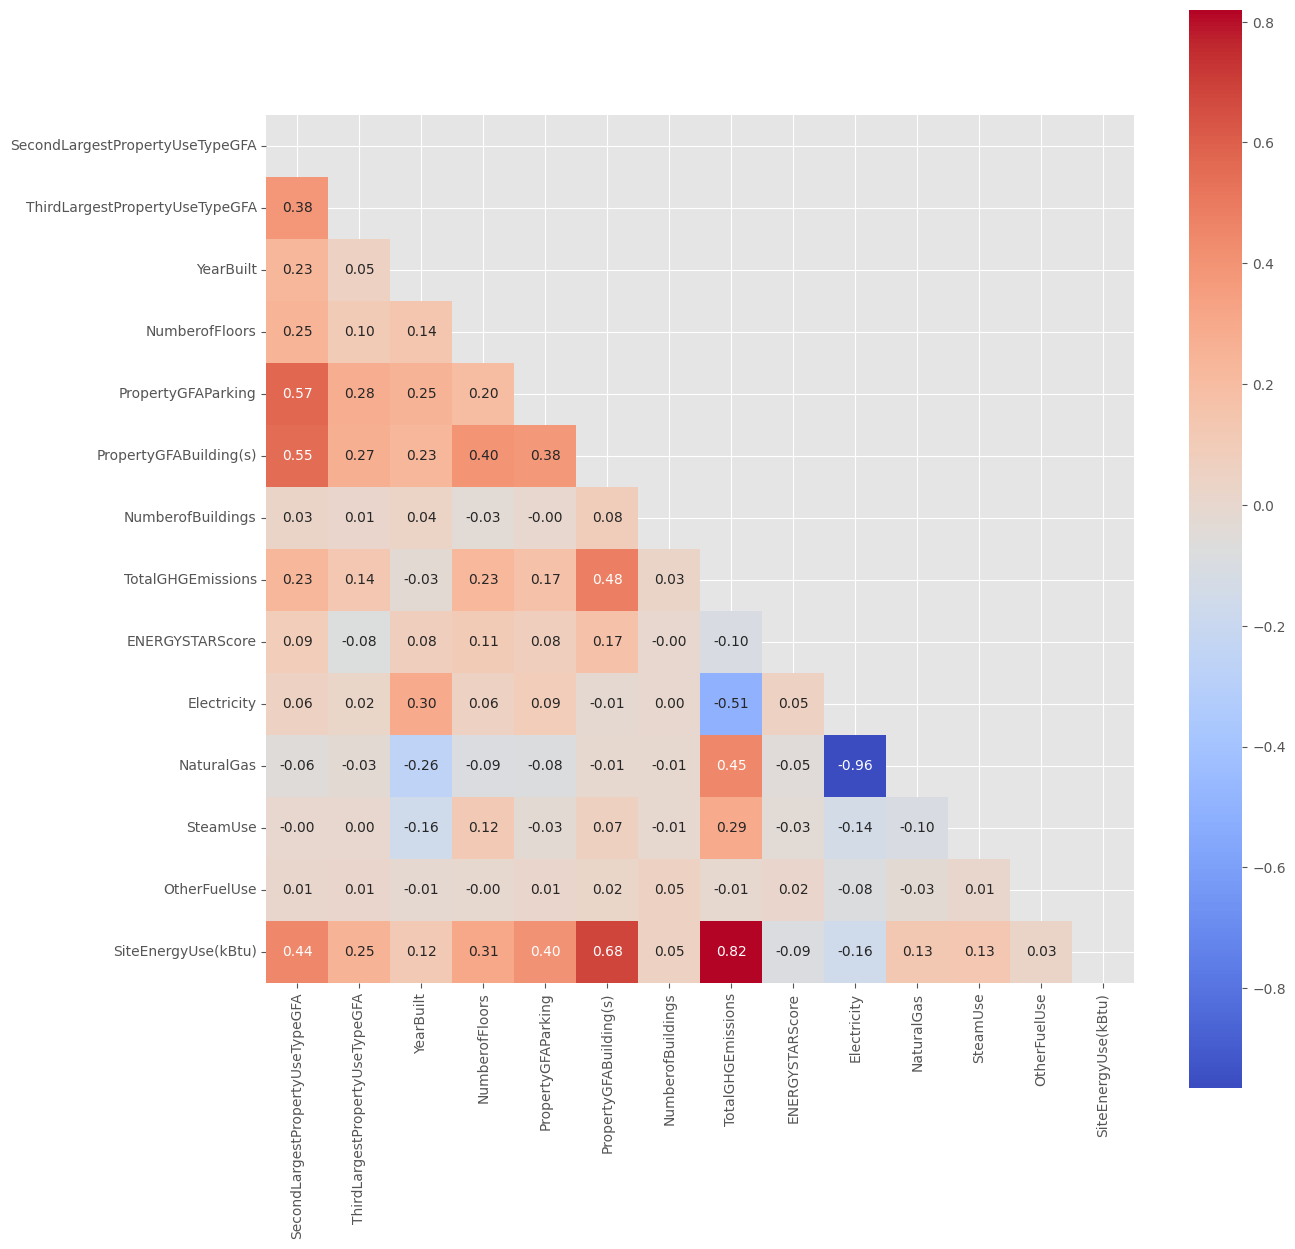

In [52]:
data = data.select_dtypes(include=[np.number])
# Handle missing values (replace with 0, but you can choose an appropriate strategy)
data.fillna(0, inplace=True)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 14))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, square=True)

# Show the plot
plt.show()

### 3.4. Feature selection

We retrieve the names of label (to predict), categorical, and numerical variables

In [53]:
# Predictive variables
y_labels = ["SiteEnergyUse(kBtu)",
            "TotalGHGEmissions",
            'Electricity',
            'NaturalGas',
            'SteamUse',
            "OtherFuelUse"]

# Predictive variables
cat_attribs = list(data.select_dtypes(include='object').columns)

# Numerical variables
num_attribs = list(data.drop(columns=cat_attribs + y_labels + ["ENERGYSTARScore"]).columns)

#### Distribution des variables numériques

##### Indicator variables (features)

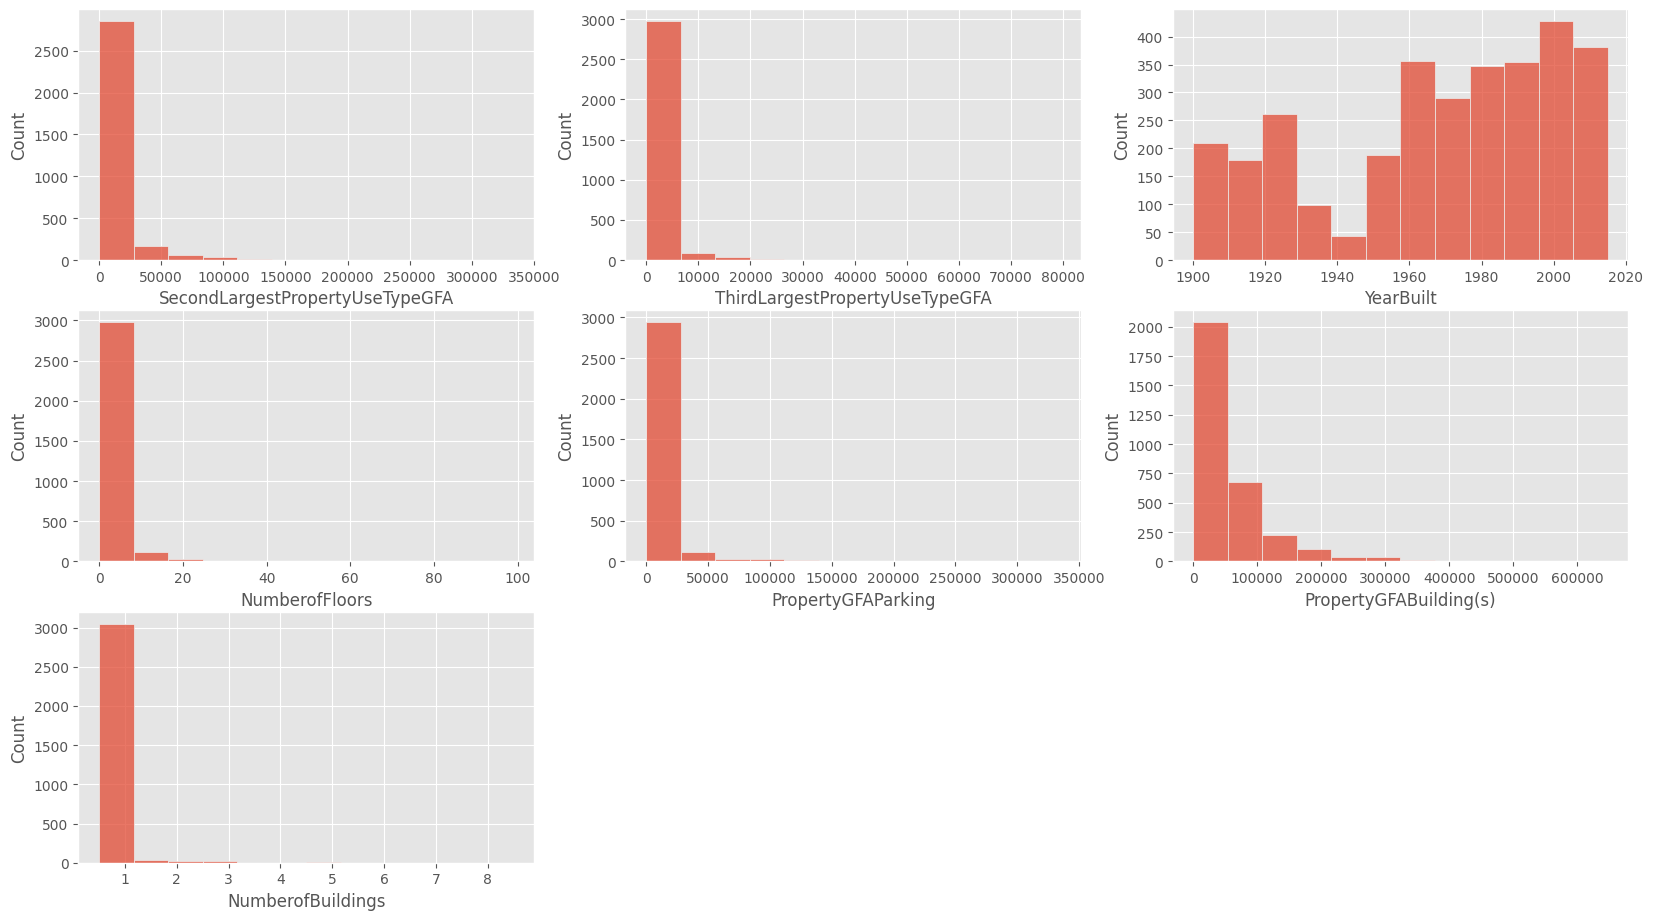

In [54]:
plt.style.use('ggplot')
fig = plt.figure(1, figsize=(20, 15))
for i, label in enumerate(num_attribs) :
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[label], bins=int(1 + np.log2(len(data))))
plt.show()

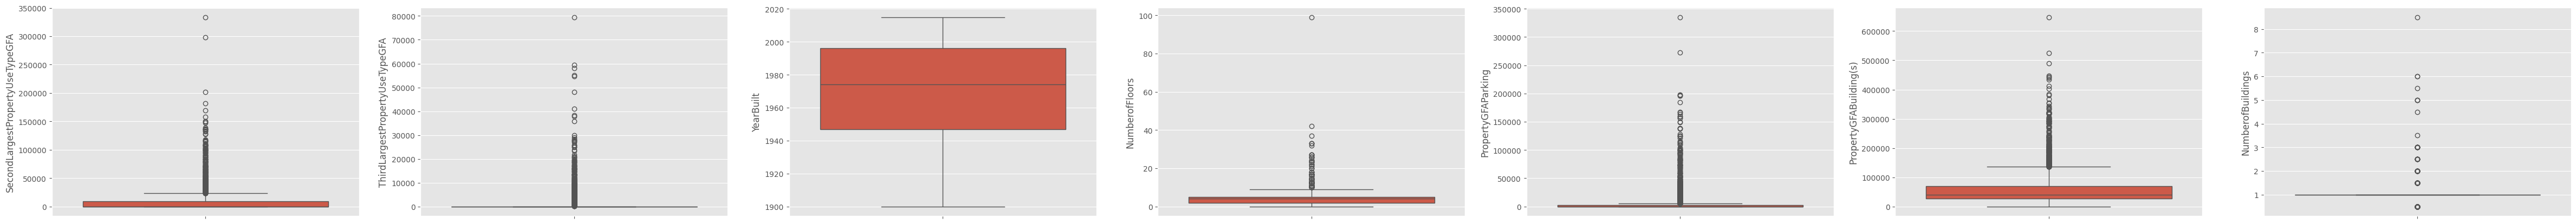

In [55]:
fig = plt.figure(1, figsize=(60, 5))
for i,label in enumerate(num_attribs) :
    plt.subplot(1,len(num_attribs), i+1)
    sns.boxplot(data[label], orient="v")
plt.show()

- The oldest buildings were constructed in 1900, and the most recent ones in 2015.
- The distribution of 'NumberofFloors' indicates the presence of single-story buildings to skyscrapers.
- Most of the individuals (in a statistical sense) in our sample of data have only one building.

#### Variables to predict

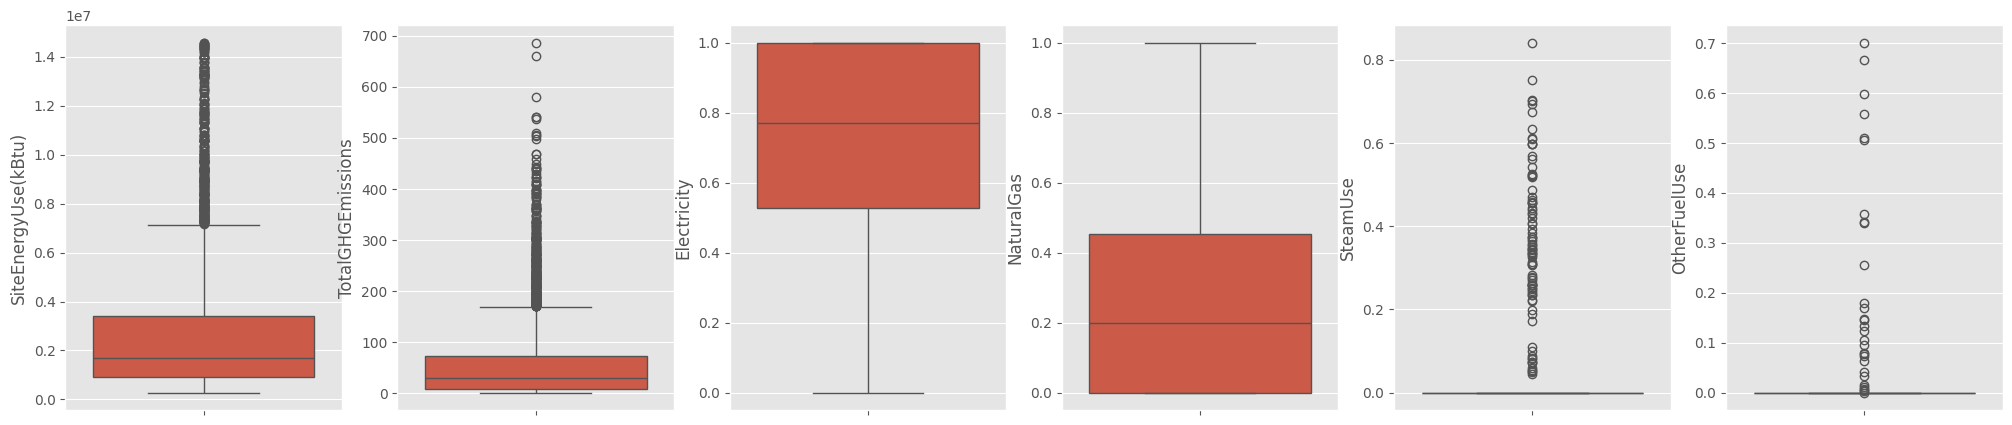

In [56]:
fig = plt.figure(1, figsize=(25, 5))
for i,label in enumerate(y_labels) :
    plt.subplot(int("1" + str(len(y_labels)) + str(i+1)))
    sns.boxplot(data[label], orient="v")
plt.show()

- Most of the buildings have almost negligible 'SteamUse' consumption. The energy balance is primarily between electricity and natural gas, with 'Steam' consumption present in a few buildings.
- Some buildings are outliers in energy consumption, and they are relatively rare, with very few buildings having consumption exceeding 1e8 kBtu.

In [57]:
# save data to csv file
data.to_csv("data_clean.csv")

#### Data preparation

#### Logarithmic transformation of the target variables

In [58]:
data.loc[:, ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]] = data.loc[:, ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]].apply(lambda x: np.log(1 + x))

#### List of categorical and numerical variables

In [59]:
# Categorical variables
cat_attribs = list(data.select_dtypes(include=['object']).columns)

# numerical variables
num_attribs = list(data.drop(columns=cat_attribs + y_labels + ["ENERGYSTARScore"]).columns)

# List of energy types
list_energy_type = ["Electricity",
                    "NaturalGas",
                    "SteamUse",
                    "OtherFuelUse"] 

#### Feature Engineering
- Total area = Ground area * Number of floors

In [60]:
PropertyGFABuilding_ix, NumberofFloors_ix = 4, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    
    def __init__(self, add_GFA_per_floor_per_building=True) :
        self.add_GFA_per_floor_per_building = add_GFA_per_floor_per_building
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.add_GFA_per_floor_per_building :
            BuildingGFA_per_floor = X[:, PropertyGFABuilding_ix]*X[:, NumberofFloors_ix]
            return np.c_[X, BuildingGFA_per_floor]
        else : 
            return X 

- Boolean variables for energy

In [61]:
class AddBooleanEnergyType(BaseEstimator, TransformerMixin) :
    
    def __init__(self, add_Boolean_EnergyType=True) :
        self.add_Boolean_EnergyType = add_Boolean_EnergyType
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.add_Boolean_EnergyType :
            
            return np.array(X > 0) * 1
        else : 
            return X 

## 4 Modeling

### 4.1 Numerical & Categorical Pipelines

Categorical variables are transformed using a target_encoder.

Target encoding involves replacing the value of each categorical variable with the mean of the target for individuals sharing the same value for the categorical variable.

#### Defining Pipelines

In [62]:
# Pipeline for numerical variables
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # Inputation des valeurs manquantes
    ('attribs_combined', CombinedAttributesAdder()), # Feature engineering
    ('std_scaler', StandardScaler()), # Normalisation of data
    ])

# Pipeline for categorical variables
cat_pipeline = Pipeline(steps=[
    ('target', TargetEncoder()),
    ('std_scaler', StandardScaler()), # Normalisation of data 
    ('imputer', SimpleImputer(strategy='mean')), # 
    ])

# Pipeline for boolean variables
add_bool_pipeline = Pipeline([
    ('bool_energy', AddBooleanEnergyType()) #types are converted to boolean variables
])

In [63]:
# Encode categorical variables and add them to the transformed numerical variables.
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("energyType", add_bool_pipeline, list_energy_type),
        ("cat", cat_pipeline, cat_attribs),
    ])

### 4.2 Split Data to Training and Testing

In [64]:
# Split en jeu d'entrainement et de test
train_set, test_set = train_test_split(data, train_size=0.8, random_state=0)

### 4.3 Label Selection

In [65]:
# target Variables 
y_labels = ["SiteEnergyUse(kBtu)",
            "TotalGHGEmissions",
            'Electricity',
            'NaturalGas',
            'SteamUse',
            "OtherFuelUse"]

### 4.4 Selection & Training of Models

##### Methodology

This project focuses on predicting two variables: energy consumption and CO2 emissions.

Here's our approach:

Total energy consumption is predicted using all available variables along with boolean variables indicating the types of energy used by the structure. For instance, if a building uses electricity as an energy source, it is assigned a value of 1; otherwise, 0 is assigned for each energy type, and so on for all energy types.

The proportion of each energy type used is predicted (also using boolean variables).

CO2 emissions are predicted using building-specific variables, the prediction of total energy consumption, and the proportion of each energy type used.

##### Metrics

In this section, two metrics are used: Mean Absolute Error (MAE) and Root Mean Square Error (RMSE).

RMSE is more sensitive than MAE to values that deviate from the norm, which allows for better handling of significant deviations. That's why RMSE is preferred and will be used for the selection of the final models. However, MAE serves as an indicative measure.

In [66]:
# Distribution of train/validation indices to obtain train/validation sets.
# Divide the dataset into k partitions
kf = KFold(n_splits=5)

In [67]:
# Result dictionaries

y_pred = {}
rmse = {}
mae = {}
final_model = {}

In [68]:
def display_scores(scores, scoring=["neg_mean_squared_error", "neg_mean_absolute_error"]):
    # Results, mean, and standard deviation

    print("Cross-validation results:")
     
    for metric in scoring: 
        results = -scores["test_" + metric]
        if metric == "neg_mean_squared_error":
            print("Metric used: RMSE")
            results = np.sqrt(results)
        else:
            print("Metric used: MAE")
        
        print("\t - Mean: {:.3f}".format(results.mean()))
        print("\t - Standard Deviation: {:.3f}".format(results.std()))
        print("\t - Coefficient of Variation: {:.2f} %".format(results.std() / results.mean() * 100))
        print("\n")

In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    # MAPE : Mean aboslute percentage error

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [70]:
def define_pipeline(preprocessor, regressor) :
    # Assembly of preprocessor and regressor
    pipe = Pipeline([("preprocess", preprocessor),
                    ("regressor", regressor),
                    ])
    return pipe

In [71]:
def graphical_display(results, title):
    
    x = list(results)
    y = np.array(list(results.values()))
    rmse_mean = [score.mean() for score in np.array(list(results.values()))]
    rmse_std = [score.std() for score in np.array(list(results.values()))]
    
    # List of colors for each segment
    palette = sns.color_palette()
    colors = palette.as_hex()[0:len(results)]
    
    fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(10,5))
    fig.suptitle(title, fontsize=18)
    # Barplot of the mean and its standard deviation
    axs[0].bar(x=x, height=rmse_mean, color=colors)
    axs[0].set_ylabel("Mean")
    # Adding error bars for standard deviation
    axs[0].errorbar(range(len(rmse_mean)), rmse_mean, yerr=rmse_std, fmt='none', ecolor='black')
    # Graph title
    axs[1].bar(x=x, height=rmse_std, color=colors)
    axs[1].set_ylabel("Variance")

    plt.show()

### 4.4.1 Total Energy Prediction

In [72]:
# Regressors Dictionary 
regressors = {                   
                   'Dummy': DummyRegressor(),
                   'Elastic Net' : ElasticNet(max_iter=1000),
                   'SVR': SVR(kernel="rbf", C=300, gamma=1),
                   'Random Forest': RandomForestRegressor(n_estimators=100, n_jobs=-1),
                   'Extra Tree': ExtraTreesRegressor(n_estimators=100, n_jobs=-1),
                   'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
                  }

_____ Dummy _____
Cross-validation results:
Metric used: RMSE
	 - Mean: 0.893
	 - Standard Deviation: 0.012
	 - Coefficient of Variation: 1.29 %


Metric used: MAE
	 - Mean: 0.739
	 - Standard Deviation: 0.012
	 - Coefficient of Variation: 1.56 %


_____ Elastic Net _____
Cross-validation results:
Metric used: RMSE
	 - Mean: 0.861
	 - Standard Deviation: 0.012
	 - Coefficient of Variation: 1.42 %


Metric used: MAE
	 - Mean: 0.714
	 - Standard Deviation: 0.012
	 - Coefficient of Variation: 1.63 %


_____ SVR _____
Cross-validation results:
Metric used: RMSE
	 - Mean: 0.737
	 - Standard Deviation: 0.014
	 - Coefficient of Variation: 1.91 %


Metric used: MAE
	 - Mean: 0.519
	 - Standard Deviation: 0.012
	 - Coefficient of Variation: 2.31 %


_____ Random Forest _____
Cross-validation results:
Metric used: RMSE
	 - Mean: 0.551
	 - Standard Deviation: 0.018
	 - Coefficient of Variation: 3.27 %


Metric used: MAE
	 - Mean: 0.399
	 - Standard Deviation: 0.016
	 - Coefficient of Variation: 3

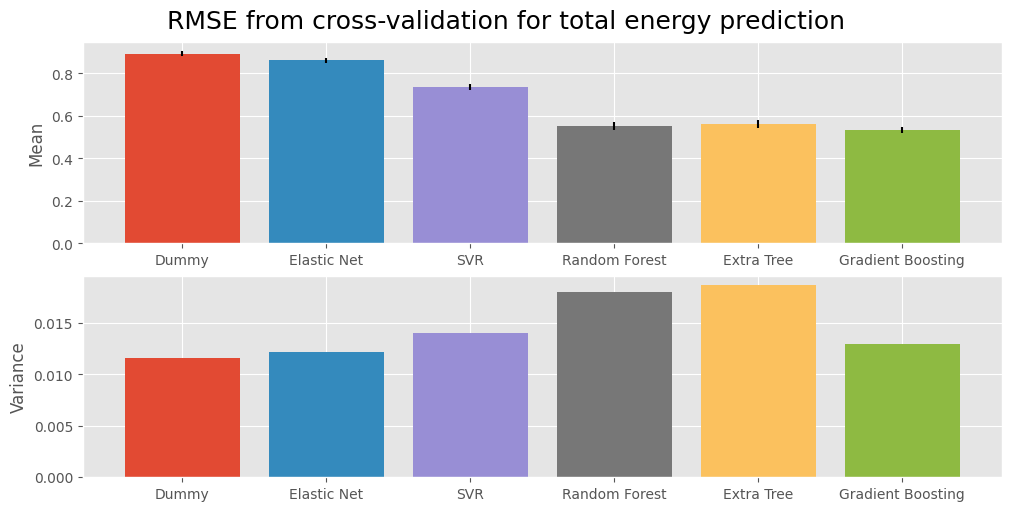

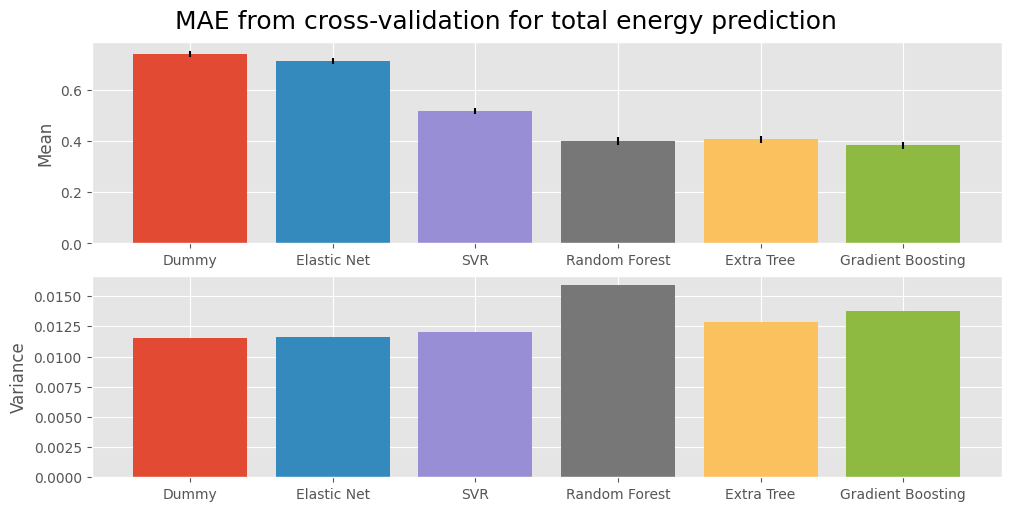

In [73]:
for name_reg, reg in regressors.items():
    print("_____", name_reg, "_____")

    pipeline = define_pipeline(full_pipeline, reg)
    # Cross-validation
    scores = cross_validate(pipeline,
                            train_set,
                            train_set["SiteEnergyUse(kBtu)"],
                            scoring=["neg_mean_squared_error",
                                     "neg_mean_absolute_error"],
                            cv=kf)
    # Calculating RMSE
    rmse[name_reg] = np.sqrt(-scores["test_neg_mean_squared_error"])
    # Calculating MAE
    mae[name_reg] = -scores["test_neg_mean_absolute_error"]

    # Displaying results
    display_scores(scores,
                   scoring=["neg_mean_squared_error",
                            "neg_mean_absolute_error"])

# Displaying RMSE results
graphical_display(rmse, "RMSE from cross-validation for total energy prediction")

# Displaying MAE results
graphical_display(mae, "MAE from cross-validation for total energy prediction")

3 Modèles se démarquent des autres et offrent sensiblement les mêmes résultats, il s'agit de :
Random Forest, Gradient de boosting, Extra Tree


Dans la partie qui suit, nous cherchons à hyper-paramétriser ces 3 modèles dans le but d'affiner les résultats

In [74]:
#  Dictionary for Random Search to store all the results
rnd_search_results = {}

In [75]:
def rnd_search(regressors, pipeline, param_grid, X, y, n_splits=5, display=True):
    """
    Optimize a list of estimators and return the best one.
    regressors(dict): Dictionary of estimators, {"name_estimator_1" : estimator_1}
    pipeline : Data transformation pipeline
    param_grid(dict) : Dictionary of parameter dictionaries, {"name_estimator_1": dict_params}
    X(np.array): Dataset
    y(np.array): Prediction
    """
    
    # Distribution of train/validation indices to obtain train/validation sets.
    # Divide the dataset into k partitions
    kf = KFold(n_splits=n_splits)
    
    rnd_search_dict = {}
    
    # Best score
    best_score = float('inf')
    # Dictionary for hyperparameterized models
    rmse_mean, rmse_std = {}, {}
    fit_time_mean, fit_time_std = {}, {}

    for name_reg, regressor in regressors.items():
        print(name_reg)
        prepare_select_and_predict_pipeline = define_pipeline(pipeline, regressor)

        rnd_search_prep = RandomizedSearchCV(prepare_select_and_predict_pipeline,
                                             param_grid[name_reg],
                                             n_iter=100,
                                             scoring='neg_mean_squared_error',
                                             cv=kf,
                                             random_state=42)
        
        # Model training
        rnd_search_prep.fit(X, y)
        
        # Save the model
        rnd_search_dict[name_reg] = rnd_search_prep
        
        best_model_index = rnd_search_prep.best_index_
        score = [np.sqrt(-rnd_search_prep.cv_results_["split" + str(i) + "_test_score"][best_model_index])
                 for i in range(n_splits)]
        
        # Model training time
        fit_time_mean[name_reg] = rnd_search_prep.cv_results_['mean_fit_time'][best_model_index]
        fit_time_std[name_reg] = rnd_search_prep.cv_results_['std_fit_time'][best_model_index]
        
        # Mean and standard deviation of RMSE
        mean_score, std_score = np.mean(score), np.std(score)
        rmse_mean[name_reg], rmse_std[name_reg] = mean_score, std_score
        score = rnd_search_prep.best_estimator_.score(X, y)
        
        print("Best model parameters: \n")
        for params, values in rnd_search_prep.best_params_.items():
             print("\t - ", params, ":", values)
        print("\nResults:")
        print("\n\t - r2 score on the training set: {:.3f}".format(score))
        print("\t - Mean of RMSE: {:.3f}".format(mean_score))
        print("\t - Standard deviation: {:.3f}".format(std_score))
        print("\t - Coefficient of variation: {:.2f} % \n".format(std_score / mean_score * 100))
        
        if mean_score < best_score:
            best_score = mean_score
            best_model = rnd_search_prep.best_estimator_
            
    if display:
        # List of colors for each segment
        palette = sns.color_palette()
        colors = palette.as_hex()[0: len(regressors_2)]

        # RMSE results plot for hyperparameter tuning
        fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 5))
        fig.suptitle("RMSE on validation sets", fontsize=18)

        axs[0].set_ylabel("Mean of RMSE", fontsize=13)
        axs[0].bar(x=list(rmse_mean.keys()), height=list(rmse_mean.values()), color=colors)
        rmse_mean_values = list(rmse_mean.values())
        rmse_std_values = list(rmse_std.values())
        axs[0].errorbar(range(len(rmse_mean)), rmse_mean_values, yerr=rmse_std_values, fmt='none', ecolor='black')
        axs[0].tick_params(axis='x', labelsize=13)

        axs[1].set_ylabel("Variance of RMSE", fontsize=13)
        axs[1].bar(x=list(rmse_std.keys()), height=list(rmse_std.values()), color=colors)
        axs[1].tick_params(axis='x', labelsize=13)
        plt.show()

        # Fit time results plot for hyperparameter tuning
        fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 5))
        fig.suptitle("Model Training Times", fontsize=18)

        axs[0].set_ylabel("Mean of Fit Time (s)", fontsize=13)
        axs[0].bar(x=list(fit_time_mean.keys()), height=list(fit_time_mean.values()), color=colors)
        fit_time_mean_values = list(fit_time_mean.values())
        fit_time_std_values = list(fit_time_std.values())
        axs[0].errorbar(range(len(fit_time_mean)), fit_time_mean_values, yerr=fit_time_std_values, fmt='none', ecolor='black')
        axs[0].tick_params(axis='x', labelsize=13)

        axs[1].set_ylabel("Variance of Fit Time (s)", size=13)
        axs[1].bar(x=list(fit_time_std.keys()), height=list(fit_time_std.values()), color=colors)
        axs[1].tick_params(axis='x', labelsize=13)
        plt.show()
        
    return rnd_search_dict

In [76]:
# Models for hyperparameter tuning
regressors_2 = {
                'Gradient Boosting': GradientBoostingRegressor(random_state=42),
                'Random Forest': RandomForestRegressor(random_state=42),
                'Extra Forest': ExtraTreesRegressor(random_state=42)   
}


In [77]:
# Hyperparameters for ensemble tree regression models
param_grid_reg_tree = {
    'preprocess__num__imputer__strategy': ['mean', 'median'],  # Strategy for imputing numerical variables
    'preprocess__cat__imputer__strategy': ['mean', 'median', 'most_frequent'],  # Strategy for imputing categorical variables
    'regressor__n_estimators': [100],  # Number of trees
    'regressor__max_depth': range(2, 20, 2),  # Maximum depth of trees
    'regressor__max_features': range(2, 20, 2)  # Maximum number of features
}

# Adding the learning rate parameter for Gradient Boosting
param_grid_gb = param_grid_reg_tree.copy()
param_grid_gb["regressor__learning_rate"] = [0.01, 0.05, 0.1]
param_grid_gb["regressor__n_estimators"] = [50, 100, 300]

# Dictionary of parameter grids
param_grid = {'Gradient Boosting': param_grid_gb,
              'Random Forest': param_grid_reg_tree,
              'Extra Forest': param_grid_reg_tree,
             }

Gradient Boosting
Best model parameters: 

	 -  regressor__n_estimators : 100
	 -  regressor__max_features : 4
	 -  regressor__max_depth : 4
	 -  regressor__learning_rate : 0.1
	 -  preprocess__num__imputer__strategy : median
	 -  preprocess__cat__imputer__strategy : median

Results:

	 - r2 score on the training set: 0.739
	 - Mean of RMSE: 0.531
	 - Standard deviation: 0.013
	 - Coefficient of variation: 2.47 % 

Random Forest
Best model parameters: 

	 -  regressor__n_estimators : 100
	 -  regressor__max_features : 4
	 -  regressor__max_depth : 16
	 -  preprocess__num__imputer__strategy : median
	 -  preprocess__cat__imputer__strategy : most_frequent

Results:

	 - r2 score on the training set: 0.904
	 - Mean of RMSE: 0.532
	 - Standard deviation: 0.016
	 - Coefficient of variation: 3.09 % 

Extra Forest
Best model parameters: 

	 -  regressor__n_estimators : 100
	 -  regressor__max_features : 6
	 -  regressor__max_depth : 18
	 -  preprocess__num__imputer__strategy : median
	 -  pre

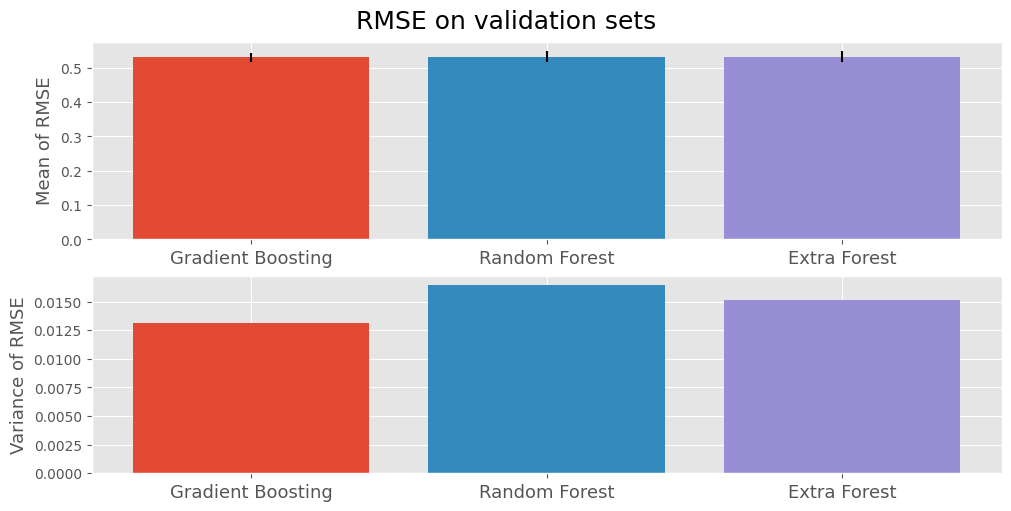

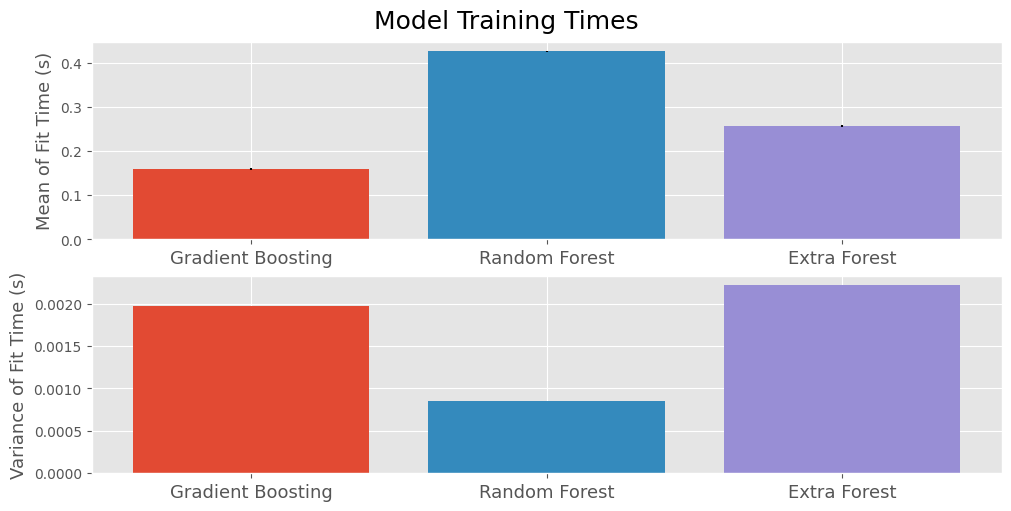

In [78]:
# Selection du meilleur modèle
rnd_search_results["SiteEnergyUse(kBtu)"] = rnd_search(regressors_2, 
                                               full_pipeline,
                                               param_grid,
                                               train_set,
                                               train_set["SiteEnergyUse(kBtu)"])

In [79]:
final_model["SiteEnergyUse(kBtu)"] = rnd_search_results["SiteEnergyUse(kBtu)"]['Extra Forest'].best_estimator_

The Extra Forest model is the one that provides the best results in terms of RMSE, while its training time is similar to the others

### 4.4.2 Energy Proportion Prediction

#### Hyperparameterization of Selected Models

In [91]:
#Training Models and Evaluation on Training Data

for energy_type in list_energy_type:
    
    print("______________" + energy_type + "______________")
        
    rnd_search_results[energy_type] = rnd_search(regressors_2, 
                                               full_pipeline,
                                               param_grid,
                                               train_set,
                                               train_set[energy_type],
                                               display=False)

______________Electricity______________
Gradient Boosting
Best model parameters: 

	 -  regressor__n_estimators : 50
	 -  regressor__max_features : 10
	 -  regressor__max_depth : 4
	 -  regressor__learning_rate : 0.1
	 -  preprocess__num__imputer__strategy : mean
	 -  preprocess__cat__imputer__strategy : most_frequent

Results:

	 - r2 score on the training set: 0.699
	 - Mean of RMSE: 0.162
	 - Standard deviation: 0.005
	 - Coefficient of variation: 3.38 % 

Random Forest
Best model parameters: 

	 -  regressor__n_estimators : 100
	 -  regressor__max_features : 6
	 -  regressor__max_depth : 6
	 -  preprocess__num__imputer__strategy : median
	 -  preprocess__cat__imputer__strategy : mean

Results:

	 - r2 score on the training set: 0.687
	 - Mean of RMSE: 0.162
	 - Standard deviation: 0.006
	 - Coefficient of variation: 3.49 % 

Extra Forest
Best model parameters: 

	 -  regressor__n_estimators : 100
	 -  regressor__max_features : 8
	 -  regressor__max_depth : 10
	 -  preprocess__num__

In [81]:
# Results are reorganized for a graphical plot
mean_rmse_dict, std_rmse_dict = {}, {}
mean_fit_time_dict, std_fit_time_std = {}, {}

for name_reg in regressors_2.keys():
    
    mean_rmse_dict[name_reg] = {}
    mean_fit_time_dict[name_reg] = {}
    std_fit_time_std[name_reg] = {}
    std_rmse_dict[name_reg] = {}
    
    for energy_type in list_energy_type:
        
        rnd_search_prep = rnd_search_results[energy_type][name_reg]
        # Fetching the best model
        best_model_index = rnd_search_prep.best_index_
        # RMSE across 5 folds
        rmse = [np.sqrt(-rnd_search_prep.cv_results_["split" + str(i) + "_test_score"][best_model_index])
                 for i in range(5)]

        # Model training time
        mean_fit_time_dict[name_reg][energy_type] = rnd_search_prep.cv_results_['mean_fit_time'][best_model_index]
        std_fit_time_std[name_reg][energy_type] = rnd_search_prep.cv_results_['std_fit_time'][best_model_index]

        # Mean and standard deviation of RMSE
        mean_rmse_dict[name_reg][energy_type] = np.mean(rmse)
        std_rmse_dict[name_reg][energy_type] = np.std(rmse)

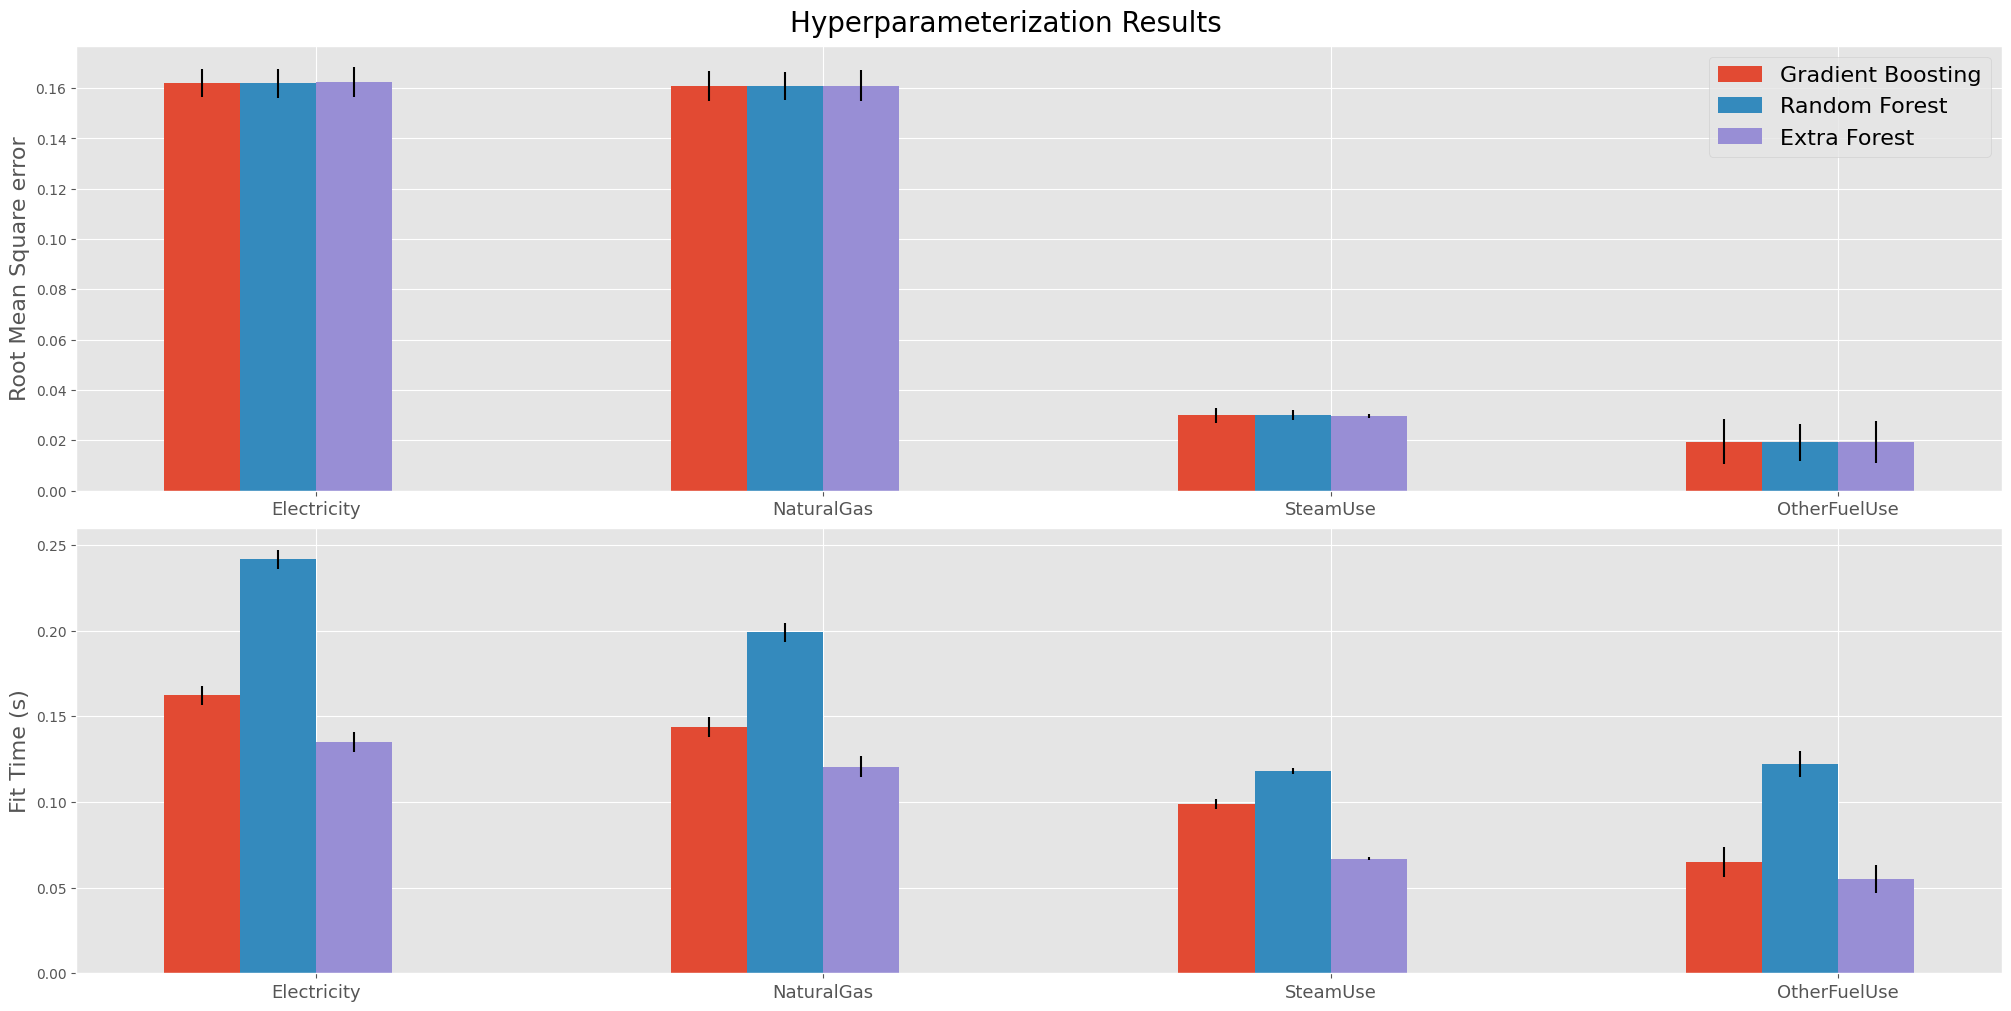

In [82]:
# Graph of results for different models and energy types
labels = list_energy_type
x = np.arange(len(labels))

width = 0.15  # the width of the bars
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, figsize=(20, 10))
y = 0

for name_reg in regressors_2.keys():
    ax1.bar(x - 3 * width / 2 + y, list(mean_rmse_dict[name_reg].values()), width, label=name_reg)
    ax1.errorbar(x=x - 3 * width / 2 + y, y=list(mean_rmse_dict[name_reg].values()), yerr=list(std_rmse_dict[name_reg].values()), fmt='none', ecolor='black')

    ax2.bar(x - 3 * width / 2 + y, list(mean_fit_time_dict[name_reg].values()), width, label=name_reg)
    ax2.errorbar(x=x - 3 * width / 2 + y, y=list(mean_fit_time_dict[name_reg].values()), yerr=list(std_rmse_dict[name_reg].values()), fmt='none', ecolor='black')

    y = y + width

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Root Mean Square error', size=16)
ax1.tick_params(axis='x', labelsize=13)
ax2.tick_params(axis='x', labelsize=13)

ax2.set_ylabel('Fit Time (s)', size=16)

plt.suptitle("Hyperparameterization Results", fontsize=20)
ax1.set_xticks(x)
ax2.set_xticks(x)

ax1.set_xticklabels(labels)
ax2.set_xticklabels(labels)

ax1.legend(fontsize=16)
plt.show()

The Extra Forest model has a slight advantage, showcasing the lowest RMSE across all energy types, with variances that promote better model generalization. Concerning the model training time, the Extra Forest model also demonstrates the best performance.

In [83]:
# The best models are stored in a dictionary of models:
final_model["Electricity"] = rnd_search_results["Electricity"]["Extra Forest"].best_estimator_
final_model["SteamUse"] = rnd_search_results["SteamUse"]["Extra Forest"].best_estimator_
final_model["NaturalGas"] = rnd_search_results["NaturalGas"]["Extra Forest"].best_estimator_
final_model["OtherFuelUse"] = rnd_search_results["OtherFuelUse"]["Extra Forest"].best_estimator_

### 4.4.3 CO2 Prediction

In this section, we will also evaluate the relevance of the ENERGYSTARScore, which is therefore added as a numerical variable for predicting CO2.

In [84]:
# List of numerical variables for CO2 prediction
num_attribs_Co2 = num_attribs.copy()
# Addition of the Energy Star Score whose usefulness for CO2 prediction will be studied
num_attribs_Co2.extend(["ENERGYSTARScore"])
# List of categorical variables for CO2 prediction
# which is exactly the same as for energy prediction
cat_attribs_Co2 = cat_attribs.copy()

#### Defining CO2 pipelines

The predictions on the various energy proportions replace the boolean variables, and the prediction of total energy is added as a numerical variable

In [85]:
class AddEnergyTypePredicted(BaseEstimator, TransformerMixin) :
    
    def __init__(self, list_energy_type) :
        self.list_energy_type = list_energy_type
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        Y = []
        for energy_type in self.list_energy_type:
            Y.append(final_model[energy_type].predict(X))
        return np.array(Y).T

In [86]:
# Pipeline for numerical variables
num_pipeline_Co2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputing missing values
    ('attribs_combined', CombinedAttributesAdder()),  # Feature engineering
    ('std_scaler', StandardScaler()),  # Data normalization
])

# Pipeline for categorical variables
cat_pipeline_Co2 = Pipeline(steps=[
    ('target', TargetEncoder()),
    ('std_scaler', StandardScaler()),  # Data normalization
    ('imputer', SimpleImputer(strategy='mean')),  # Imputing missing values
])

# Pipeline for energy variables (adding predictions)
energy_pipeline = Pipeline([
    ('bool_energy', AddEnergyTypePredicted(list_energy_type + ["SiteEnergyUse(kBtu)"])) 
])

# Pipeline to transform variables for CO2 prediction
full_pipeline_co2 = ColumnTransformer([
        ("num", num_pipeline_Co2, num_attribs_Co2),
        ("energyType", energy_pipeline, list(train_set.columns)),
        ("cat", cat_pipeline_Co2, cat_attribs_Co2),
])

 #### Hyperparameterization of the selected model

Gradient Boosting
Best model parameters: 

	 -  regressor__n_estimators : 300
	 -  regressor__max_features : 8
	 -  regressor__max_depth : 10
	 -  regressor__learning_rate : 0.05
	 -  preprocess__num__imputer__strategy : mean
	 -  preprocess__cat__imputer__strategy : median

Results:

	 - r2 score on the training set: 1.000
	 - Mean of RMSE: 0.370
	 - Standard deviation: 0.009
	 - Coefficient of variation: 2.56 % 

Random Forest
Best model parameters: 

	 -  regressor__n_estimators : 100
	 -  regressor__max_features : 10
	 -  regressor__max_depth : 16
	 -  preprocess__num__imputer__strategy : mean
	 -  preprocess__cat__imputer__strategy : median

Results:

	 - r2 score on the training set: 0.987
	 - Mean of RMSE: 0.368
	 - Standard deviation: 0.009
	 - Coefficient of variation: 2.54 % 

Extra Forest
Best model parameters: 

	 -  regressor__n_estimators : 100
	 -  regressor__max_features : 12
	 -  regressor__max_depth : 18
	 -  preprocess__num__imputer__strategy : mean
	 -  preprocess__

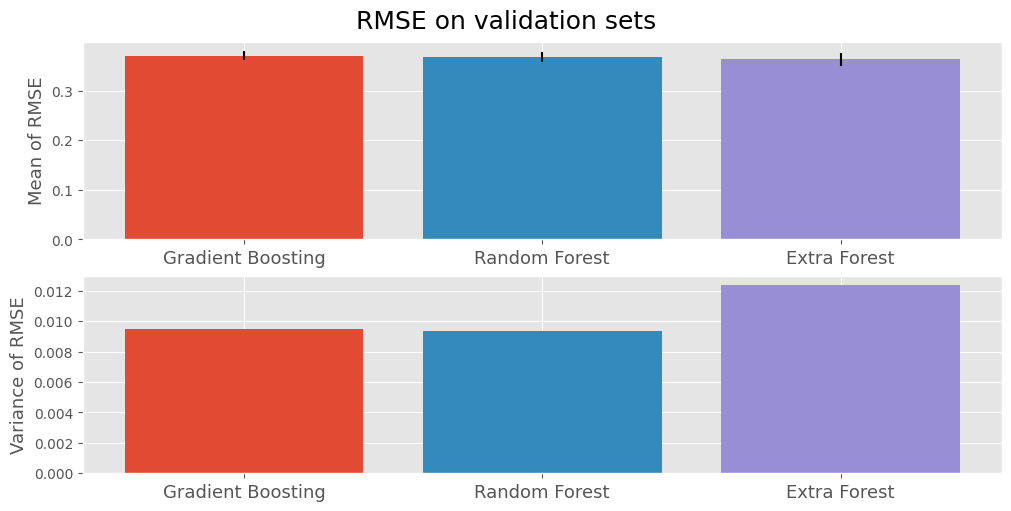

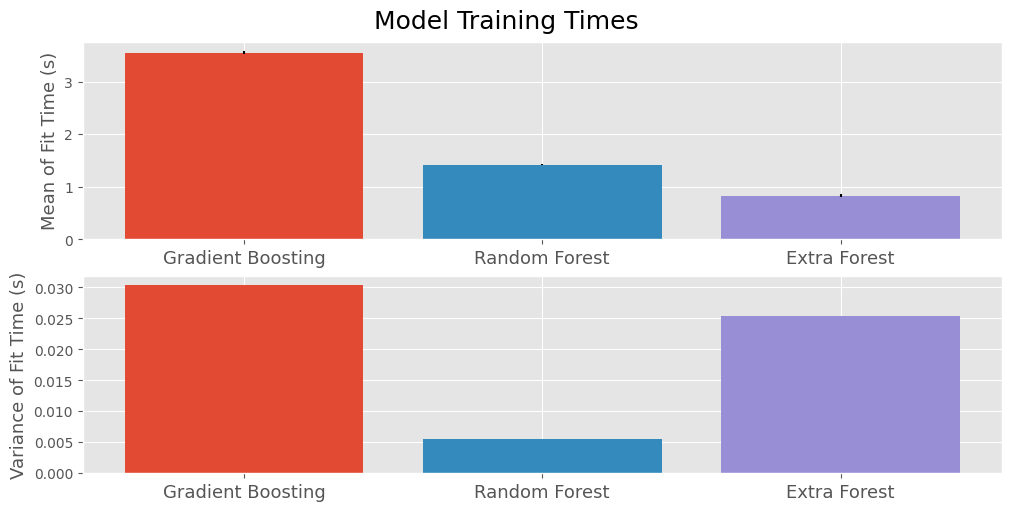

In [87]:
# Selection of best model
rnd_search_results["TotalGHGEmissions"] = rnd_search(regressors_2, 
                                                     full_pipeline_co2,
                                                     param_grid,
                                                     train_set,
                                                     train_set["TotalGHGEmissions"])

The best model is Gradient Boosting with the lowest RMSE and a variance that enables model generalization. The training time is not significantly higher than the others

In [88]:
# 6 Models to be saved: SiteEnergyUse(kBtu), Electricity, NaturalGas, SteamUse, OtherFuelUse, TotalGHGEmissions
for label, model in final_model.items() : 
    # Nom du modèle
    filename = 'final_model' + label + '.sav'
    # Sauvegarde du modèle
    pickle.dump(model, open(filename, 'wb'))

### 4.4.4 ENERGYSTARScore Influence

The Energy Star Score is a rating between 1 and 100 that reflects the energy efficiency of a building compared to similar certified buildings. A score of 50 means it is at the median, while a score above 75 indicates a high-performance building.

In [89]:
def plot_feature_importances(feature_importances, attributes):
    
    # Sorting features by importance for graphical display
    features = np.array([[feature, attrib] for feature, attrib in sorted(zip(feature_importances, attributes), reverse=True)])
    features_labels = [attrib for value, attrib in sorted(zip(feature_importances, attributes), reverse=True)]
    features_values = [value for value, attrib in sorted(zip(feature_importances, attributes), reverse=True)]

    # Bar Plot Display
    fig = plt.figure(1, figsize=(25, 5))
    plt.subplot(121)
    sns.barplot(x=features_labels[0:20], y=[100*v for v in features_values[0:20]], orient='v')
    plt.ylabel("%")
    plt.title("Features Importances")
    plt.xticks(rotation=90)
    
    # Pie plot for ENERGYSTARScore
    plt.subplot(122)
    feat_imp_energystarscore = features_values[features_labels.index('ENERGYSTARScore')]
    values = [1-feat_imp_energystarscore, feat_imp_energystarscore]
    plt.pie(values, labels=["Other Features", "ENERGYSTARScore"],
            autopct='%1.1f%%')
    plt.title("Relative Importance of ENERGYSTARScore compared to all other features")
    plt.show()

The most influential variables for predicting CO2 emissions

In [90]:
# Retrieve the values of the importance of each feature
feature_importances = final_model["TotalGHGEmissions"][-1].feature_importances_

# List of all attributes
extra_attribs = ["FloorsGFA"]
attributes = num_attribs_Co2 + extra_attribs + list_energy_type + ["SiteEnergyUse(kBtu)"] + cat_attribs_Co2
 
# Display the feature importance graph
plot_feature_importances(feature_importances, attributes)

KeyError: 'TotalGHGEmissions'

In [92]:
# Check keys in final_model
print(final_model.keys())

dict_keys(['SiteEnergyUse(kBtu)', 'Electricity', 'SteamUse', 'NaturalGas', 'OtherFuelUse'])


- Logically, energy-related variables appear at the top of the ranking, as CO2 emissions are fundamentally linked to energy combustion or production.

- The 'ENERGYSTARScore' label has very little influence on the calculation of CO2 prediction.

### 4.5  Results on the Test Set

In [ ]:
# Function for inverse transformation on our target variables
f = lambda x : np.exp(x) - 1
y_test_true = test_set.copy().reset_index(

In [ ]:
y_test_pred = pd.DataFrame()

# Results on the Test Set
print("Results on the Test Set:", "\n")
for label in ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]:
    print("_______", label, "_______")

    y_test_pred[label] = final_model[label].predict(test_set)

    y_true, y_pred = y_test_true[label].apply(f), y_test_pred[label].apply(f)
    
    r2 = final_model[label].score(test_set, test_set[label])  # r2_score
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # root mean squared error
    mape = mean_absolute_percentage_error(y_true, y_pred)  # mean absolute percentage error
    mean_abs_error = mean_absolute_error(y_true, y_pred)  # mean absolute error

    
    print("r2 score:", r2)
    print("rmse:", rmse)
    print("mape: {:.2f} %".format(mape))
    print("mean absolute error:", mean_abs_error, "\n")

In [ ]:
# 10 batiments séléctionnés aléatoirement
nbr_batiments=10
index_bat = np.random.permutation(y_test_true.index)[0:nbr_batiments]

# Séléction des 10 bâtiments
bat_table = y_test_true.loc[index_bat]

fig = plt.figure(1, figsize=(12,5))
for i, label in enumerate(["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]) :
    # valeurs test réelles et valeurs test prédites
    y_true, y_pred = y_test_true.loc[index_bat, label].apply(f), y_test_pred.loc[index_bat, label].apply(f)
    
    bat_table[label]  = y_true
    # Calcul de l'écart relatif entre valeurs réelles et valeurs prédites
    bat_table[label + " %"] = 100*abs(y_true - y_pred)/y_true
    
    ax = plt.subplot(1,2,i+1)
    ax.set_title(label)
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.scatter(y_true, y_pred)
    
    x_max = max(y_true.max(), y_pred.max())
    x_min = min(y_true.min(), y_pred.min())
    
    plt.xticks(rotation=45)

    plt.plot([x_min, x_max] ,[x_min, x_max])
plt.show()